## Исследование данных о продажах компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В анализе используются данные до 2016 года для планирования рекламной кампании на 2017 год. 
В данных попадается аббревиатура ESRB (Entertainment Software Rating Board) - это ассоциация, определяющая возрастной рейтинг  компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию. 
В нашем исследовании есть несколько основных категорий:

*E(«Everyone») — «Для всех»:* Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году.

*E10+(«Everyone 10 and older») — «Для всех старше 10 лет»:* Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

*M(«Mature») — «От 17 лет»:* Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Из последних игр это Saboteur, Left 4 Dead 2.

*T(«Teen») — «Подросткам 13—19 лет»:* Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Примером может являться Rise of the Argonauts.

*K-A(«Kids to Adults») — «Для детей и взрослых»:* Содержание игры вполне подходит для возрастной категории старше 6 лет. Такие игры подходят для всех возрастов. Они могут содержать минимальное насилие или немного грубый разговорный язык. Этот рейтинг был заменён на «E» 1 января 1998 года и может встречаться только в играх, изданных ранее, кроме The Simpsons Cartoon Studio.

*AO(«Adults Only 18+») — «Только для взрослых»:* Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Не знаю ни одной игры с таким рейтингом, если вспомните - скажите.

*EC(«Early childhood») — «Для детей младшего возраста»:* Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «E».

*RP( «Rating Pending»») — «Рейтинг ожидается»:* Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

**Цель исследования** - понять, на какой потенциально популярный продукт стоит сделать ставку и спланировать рекламную кампанию в зависимости от результата анализа. Какие платформы, с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.

**Исследование пройдет этапы:**
1. Обзор данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Составление портрета пользователя каждого региона(Северная Америка, Европа, Япония);
5. Проверка гипотез.


In [1]:
#подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn

In [2]:
#открываем файл
df = pd.read_csv('C:/Users/nasty/OneDrive/Документы/Яндекс Практикум/Сборный проект Игры/games.csv')

In [3]:
#выведем первые 10 строк датасета
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#посмотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#посмотрим за какой период собраны данные
min(df['Year_of_Release']), max(df['Year_of_Release'])

(1980.0, 2016.0)

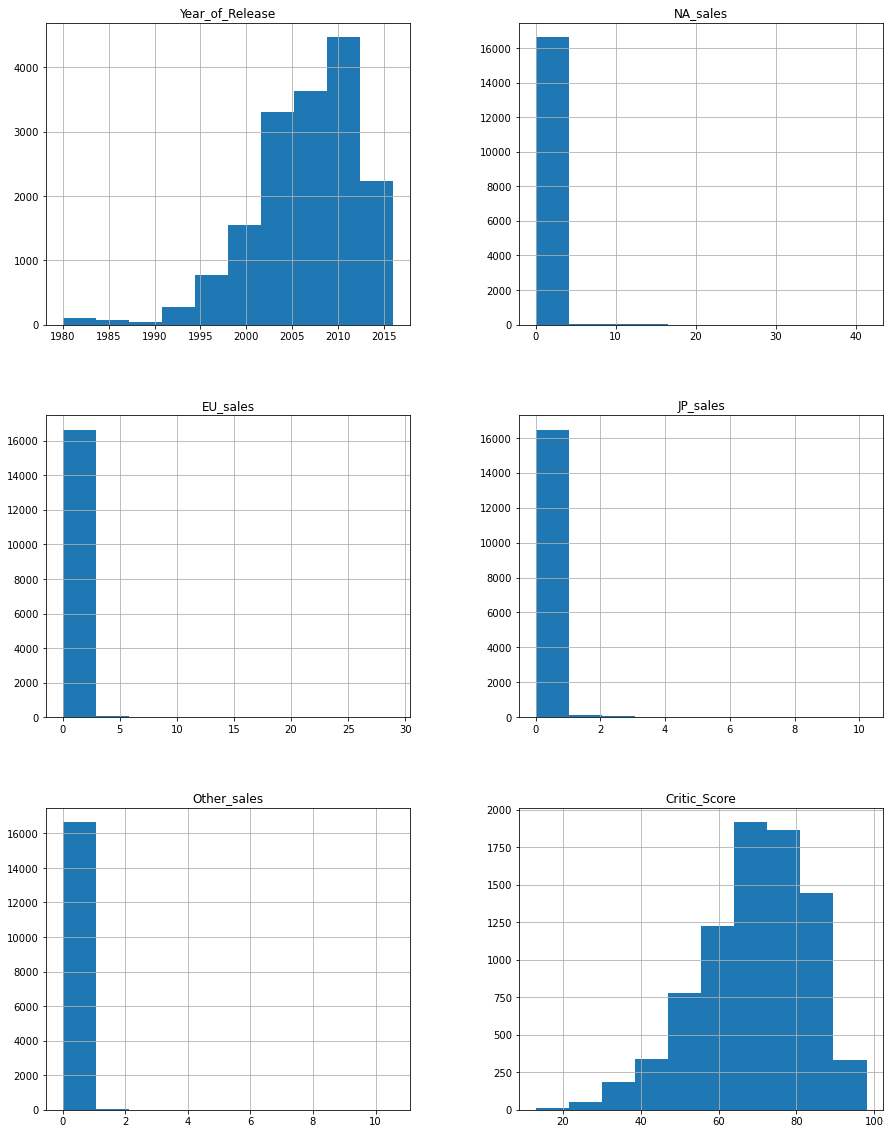

In [6]:
#выведем гистограммы датасета
df.hist(figsize=(15, 20));

Описание данных

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Предобработка данных

Для начала убедимся, что данные не имеют строк-дубликатов.

In [7]:
#выведем количество строк дубликатов
df.duplicated().sum()

0

Теперь посмотрим на названия столбцов:

In [8]:
#вывод списка столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Заметим, что названия столбцов имеют разные регистры. Изменим столбцы - приведем к нижнему регистру.

In [9]:
#приведение к нижнему регистру
df.columns = [x.lower() for x in df.columns]

In [10]:
#вывод столбцов для проверки
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [11]:
#другой способ для себя
#df = df.rename(columns = {'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales','Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating'})

Обратим теперь внимание на содержимое в столбцах и типы этих столбцов. 

In [12]:
#повторим вывод информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбце "year_of_release" - год выпуска игры - имеет тип 'float'. Можно было бы преобразовать к datetime, но известен лишь год. Формат '2000-01-01 00:00:00' нам не к чему, и он плохо отображается на графике. Приведем к типу int64.

In [13]:
#преобразование столбца с датой
#df['year_of_release'] = pd.to_datetime(df['year_of_release'], format = '%Y')

In [14]:
#приведение столбца к формату int64
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [15]:
#вывод датасета для проверки
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Также, столбец "user_score" имеет тип 'object'. Рассмотрим значения в столбце:

In [16]:
#вывод уникальных значений
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце встретилось значение 'tbd'. Из интернет-источников удалось выяснить, что данная аббревиатура в мире игр означает 'To Be Determined', то есть 'Будет определено'. 

Данные значения всё равно, что 'Нет данных'. Можно их заменить на 'NaN' - мы не сможем заменить значения пользовательской оценки.

In [17]:
#преобразование столбца в числовой формат типа float64
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [18]:
#проверка выводом информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Все остальные столбцы имеют подходящий данным формат.

Теперь посмотрим на пропуски.

In [19]:
#выведем количество пропусков в каждом столбце
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

1) Столбец **'name'** и **'genre'**

Количество пропусков в обоих столбцах - 2. Возможно, это одни и те же строки. Проверим эту гипотезу - выведем строки с пустыми значениями для каждого столбца.

In [20]:
#вывод строк с пустым значением name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [21]:
#вывод строк с пустым значением genre
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно, индексы строк одинаковые. Эти строки также имеют пропуски в столбцах с оценками. 2 строки - это менее 0.01% данных. Также, это очень старый период, в целом в дальнейшем он будет не актуален. Можем удалить эти строки.

In [22]:
#перезапись датасета без пустых значений двух столбцов
df = df.dropna(subset=['name', 'genre'])

In [23]:
#вернемся к полному списку пустых столбцов
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

2) Столбец **'year_of_release'**

In [24]:
#вывод количества пустых значений столбца
df['year_of_release'].isna().sum()

269

In [25]:
#вывод строк с пустыми значениями
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 строк - это 1.6% датасета. Посмотрим как можно восполнить пропуски.

Посмотрим первое название из таблицы - Madden NFL 2004:	

In [26]:
#вывод строк с игрой Madden NFL 2004
#df[df['name'] == 'Madden NFL 2004']

Можно заметить, что для других платформ дата выпуска известна, и она одинаковая. Можем предположить, что во многих случаях дата выхода игры была для всех платформ одинаковой - заполним такие пропуски.

In [27]:
#заполнение пропусков года, где имена одинаковые и известен год выхода на других платформах
#for i in df[df['year_of_release'].isna()].index:  
    #df.loc[i, 'year_of_release'] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

In [28]:
# Комментарий ревьюера
# Эта игра выходила в разные года на одной платформе
df.query('name == "Need for Speed: Most Wanted"') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [29]:
df.dropna(subset=['year_of_release'], inplace=True)

In [30]:
#вывод количества пустых значений
df['year_of_release'].isna().sum()

0

In [31]:
#вывод датасета с пустыми значениями года
#df[df['year_of_release'].isna()]

Обратим внимание на первую строчку - название wwe Smackdown vs. Raw 2006 - в нём указан год. Проверим интернет источники. 
Год выхода этой игры - 2005. Посмотрим на все такие строчки:

In [32]:
#вывод строк, где в названии есть год 2000-х и пустое значение года
#df[df['name'].str.contains('20')&(df['year_of_release'].isna())]

Можно предположить,что дата в названии больше на год. Игру релизили в год до этого (допустим,осенью накануне), и сама игра продавалась в будущем году.

* *Есть исключения: Tour de France 2011 - 2011 год, Sega Rally 2006 - 2006 год.*	

In [33]:
#заполнение пропуска года в строке с игрой wwe Smackdown vs. Raw 2006
#df.loc[df['name'] == 'wwe Smackdown vs. Raw 2006', 'year_of_release'] = 2005

In [34]:
#заполнение пропуска года в строке с игрой NFL GameDay 2003
#df.loc[df['name'] == 'NFL GameDay 2003', 'year_of_release'] = 2002

In [35]:
#заполнение пропуска года в строке с игрой All-Star Baseball 2005
#df.loc[df['name'] == 'All-Star Baseball 2005', 'year_of_release'] = 2004

In [36]:
#заполнение пропуска года в строке с игрой Tour de France 2011
#df.loc[df['name'] == 'Tour de France 2011', 'year_of_release'] = 2011

In [37]:
#заполнение пропуска года в строке с игрой Sega Rally 2006
#df.loc[df['name'] == 'Sega Rally 2006', 'year_of_release'] = 2006

In [38]:
#заполнение пропуска года в строке с игрой Football Manager 2007
#df.loc[df['name'] == 'Football Manager 2007', 'year_of_release'] = 2006

In [39]:
#df[df['name'].str.contains('20')&(df['year_of_release'].isna())]

In [40]:
#вывод числа пустых значений
df['year_of_release'].isna().sum()

0

Проверим тоже самое для игр 1990-х:

In [41]:
#вывод строк с названием % 19- и пустым значением года выпуска
#df[df['name'].str.contains('19')&(df['year_of_release'].isna())]

3) Столбцы **'critic_score'** и **'user_score'**

In [42]:
#вывод количества пустых строк
df['critic_score'].isna().sum()

8461

In [43]:
#вывод количества пустых строк
df['user_score'].isna().sum()

8981

8576 строк и 9123 строки - это существенная доля данных - 51% и 55% соответственно. Больше половины данных. Но можем ли мы что-то с ними сделать?

Если брать медиану, например, по жанрам или т.п. - это может сильно исказить данные. Допустим, критики поставили игре высокую оценку, а пользователи оценили совсем иначе. Получается, обратная корреляция между оценками, но по жанру обе будут по медиане. Плюс, по жанру средние и медианные оценки будут одними, например, не пользуется успехом какой-то жанр, но внутри него есть какие-то супер успешные игры - это слишком усреднит остальные игры и не даст нужного результата от исследования.

Считаю неверным заполнять пропуски медианой или средним.

Еще стоит указать, что наши данные собраны с 1980 года. Стоит также указать, что оценки пользователей и критиков начались позже, во второй половине 1990-х. 

In [44]:
#вывод строк с пусытми оценками критиков до 1996 года
df[(df['critic_score'].isna())&(df['year_of_release'] < 1996)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


4) Столбец **'rating'**

Организация ESRB (Entertainment Software Rating Board) - ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.
В данном столбце собраны метки рейтинга ассоциации.

In [45]:
#вывод количества значений в столбце
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [46]:
#вывод количества пустых строк в столбце рейтинг
df['rating'].isna().sum()

6676

6764 строки - это 40.5% данных. Почти половина. 
К сожалению, здесь также не удастся восстановить данные. Стоит также заметить, что сама организация появилась в 1994 году. Соответственно, ранее этого рейтинга быть не могло.

In [47]:
#вывод пустых значений столбца с рейтингом до 1994 года
df[(df['rating'].isna())&(df['year_of_release'] < 1994)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13571,Sonic the Hedgehog 2 (8-bit),GG,1992,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Таких строк, правда,всего 361. Но всё же, природа пропусков здесь понятна. 

Еще стоит заметить, ESRB - организация проставляет оценки только для игр, выходящих в Канаде и США. 
Т.е. игры, выходящие только в Японии (скорее всего там есть продажи, а в других колонках нет), укажет на то, что рейтинга там и не должно быть. Сюда же относятся игры для Европы - для них тоже попросту не ставятся категории ESRB.

Посмотрим на этот список:

In [48]:
#вывод строк с пустыми значениями рейтинга и продажами только в Японии
df[(df['rating'].isna())&(df['na_sales'] == 0.00)&(df['eu_sales'] == 0.00)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.0,0.0,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009,Misc,0.0,0.0,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.0,0.0,3.44,0.00,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.0,0.0,3.19,0.00,NaN,NaN,NaN
530,Dragon Quest V: Tenkuu no Hanayome,SNES,1992,Role-Playing,0.0,0.0,2.78,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.0,0.0,0.01,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,0.01,0.00,NaN,NaN,NaN


Первая игра из списка - Monster Hunter Freedom 3 - действительно выпущена Японией, и по запросу 'ESRB' данных не находится. 

Этим объясняется природа многих строк пропусков. Всё остальное можно списать на недогруженные данные.

Как бы пропуски не объяснялись, заполнить мы их не можем. Что мы можем сделать: заменить пропуски значением - нет данных - 'Unknown'.

In [49]:
#заполнение пустых строк с рейтингом на значение Unknown
df['rating'] = df['rating'].fillna('Unknown')

In [50]:
#вывод пустых значений для проверки
df['rating'].isna().sum()

0

Для дальнейшего анализа добавим столбец суммарных продаж во всех регионах.

In [51]:
#добавление столбца с продажами по всем регионам
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [52]:
#вывод датасета
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


Для заполнения пропусков по столбцам недостаточно данных, и сами данные незаменяемы медианой и т.п. Немного удалось заполнить пропуски с годом. Можем производить дальнейший анализ.

In [53]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Исследовательский анализ данных

#### *Посмотрим, сколько игр выпускалось в разные года.*

Text(0, 0.5, 'Количество выпущенных игр')

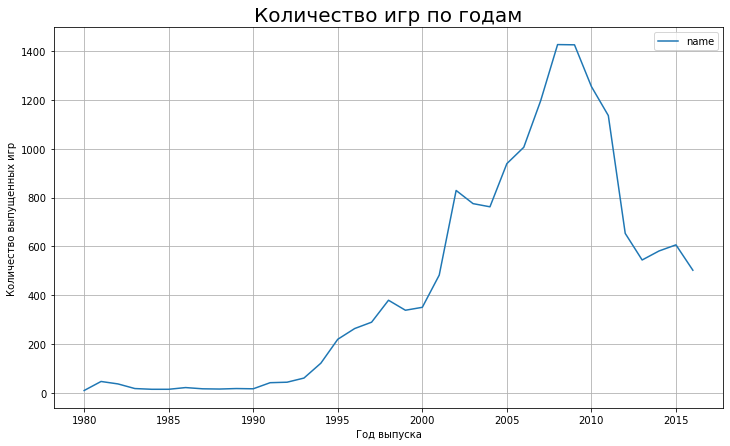

In [54]:
#построение графика зависимости годов и количества выпущенных игр
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid = True, figsize = (12, 7))
plt.title("Количество игр по годам", fontsize=20)
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

###### Вывод:
   Компьютерные игры длительное время не были популярны, и только в 1970-х и 1980-х годах, когда появились доступные для широкой публики аркадные автоматы, игровые консоли и домашние компьютеры, компьютерные игры становятся частью поп-культуры.
    
   В **1981** компания «IBM» начинает продажи своего первого персонального компьютера.
    
   В **1982** создан интернет (глобальная сеть). Точнее говоря, создан единый сетевой протокол передачи данных – TCP/IP. Эта стандартизация и позволила объединить разрозненные локальные сети в единую мировую сеть – интернет. (Сама идея единого протокола TCP/IP появилась ещё в 1974 году).
    
   В **1983** создана приставка «Nintendo Entertainment System» (NES).
    
   В **1984** фирма «Apple» выпустила свой новый компьютер «Macintosh» (Mac).
    
   В **1985** поступили в продажу компьютеры «Commodore Amiga».
   
   В **1986** выходит приключенческая игра «The Legend of Zelda».
    
   В эти года стартовало массовое распространение домашних компьютеров и отсюда стартуют наши данные. 
    
   С **1987** стартовало качественное развитие графики и звукаю.
    
   В **1990** создан современный интернет (World Wide Web, WWW). С этого момента продажи начали заметно расти.
    
   В **1997** случился рассвет сетевых и онлайн-игр. Создана первая MMORPG - «Ultima Online».
   
   Еще одной характерной точкой можно назвать 2000 год.
   
   В **2000** выходит приставка «PlayStation 2». У приставки есть возможность сетевой игры и выхода в интернет. На сегодняшний день эта приставка остаётся самой популярной на свете.
   
   В **2001** компания «Microsoft» выпускает свою игровую приставку «Xbox». Американская консоль не смогла составить серьезную конкуренцию «PlayStation 2», но завоевала определённую популярность в мире.
   
   В этих годах и происходит существенный рост на графике.
   
   В **2008** году на графике начинается спад - возможно, это связано с экономическим кризисом во всем мире, сильнее всего он затронул Японию и США. Это крупнейшие производители игровых приставок, и крупнешие игровые студии расположены там. Производство игр уменьшили, оставили только те игры, которые гарантированно принесут прибыль, либо просто уменьшили расходы и закрыли/заморозили начатые проекты.
    

#### *Посмотрим, как менялись продажи по платформам.*

In [55]:
#создание списка уникальных названий платформ
list_platform = df['platform'].unique()
list_platform

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<Figure size 432x288 with 0 Axes>

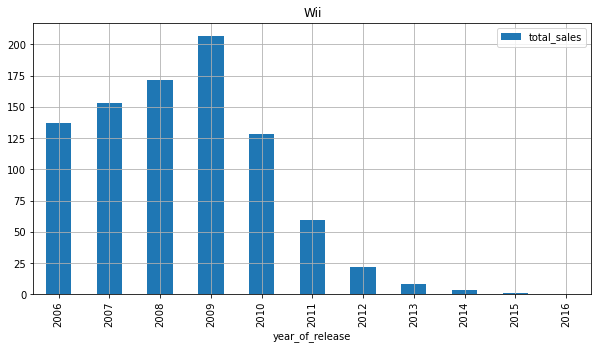

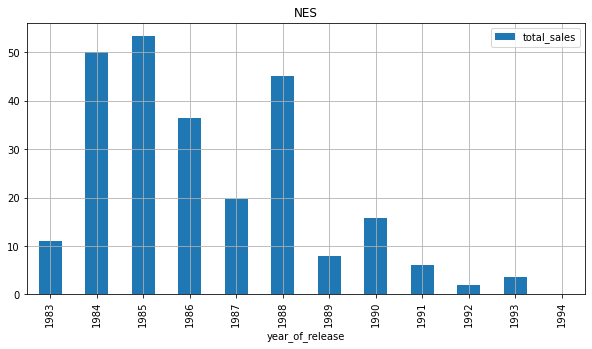

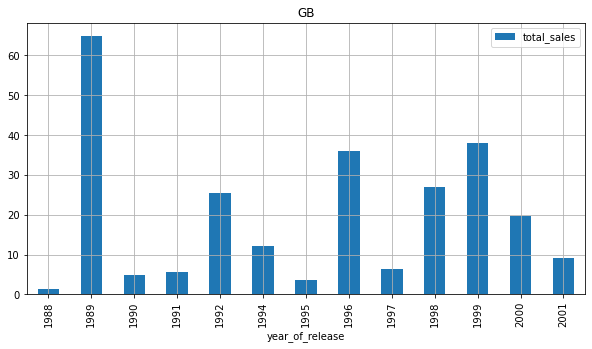

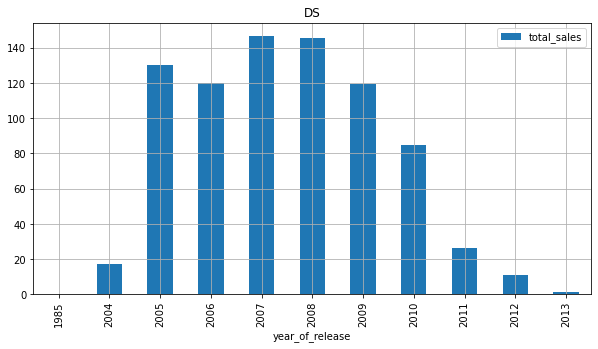

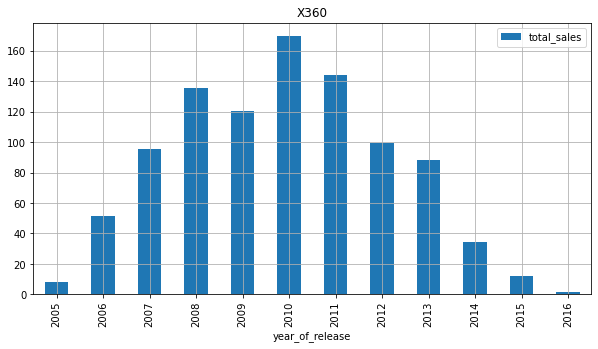

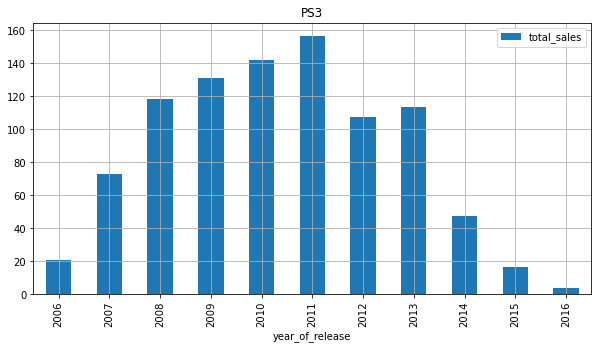

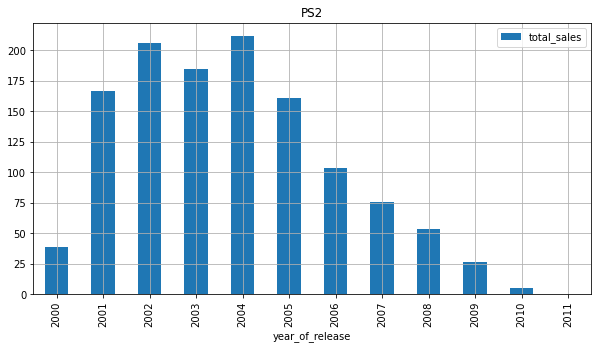

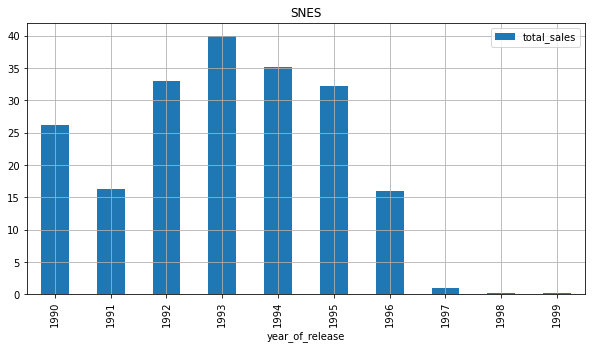

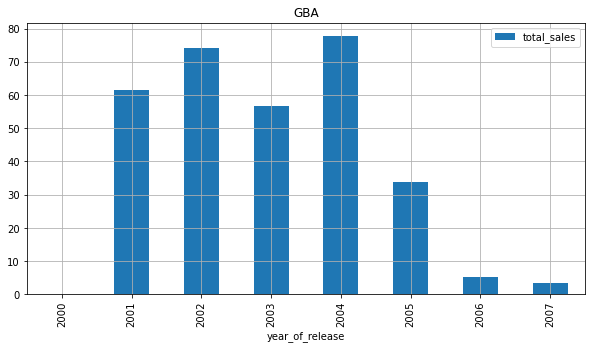

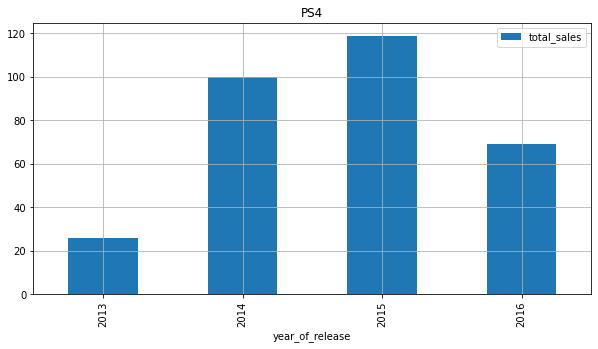

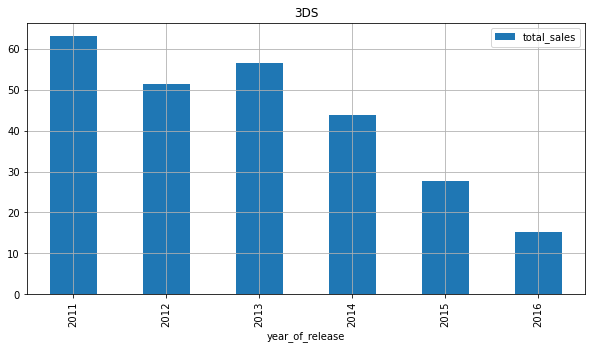

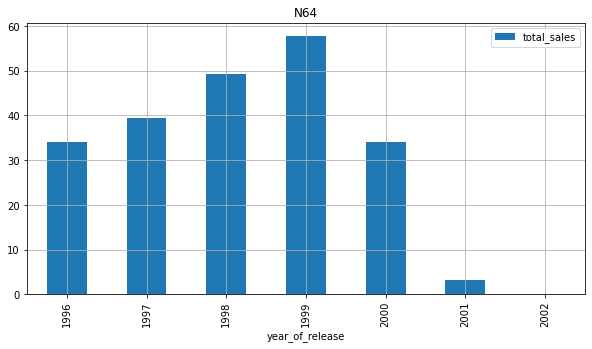

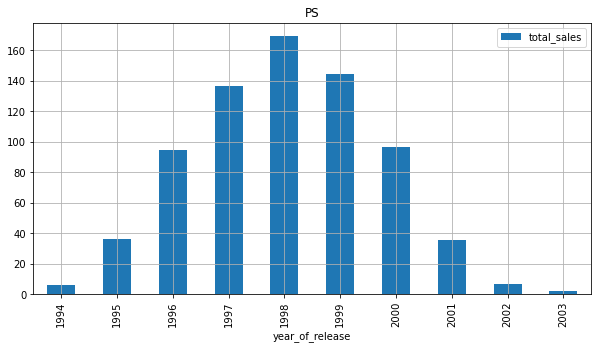

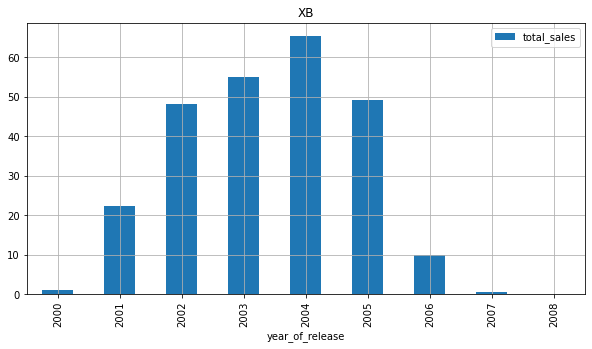

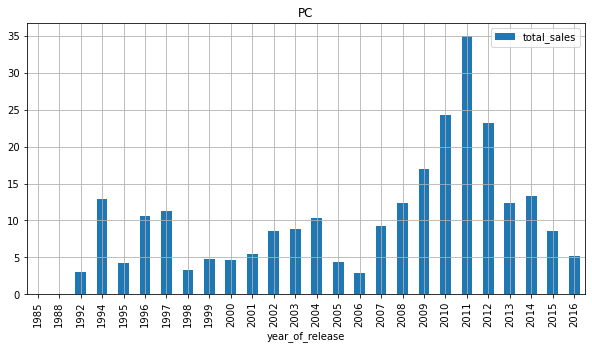

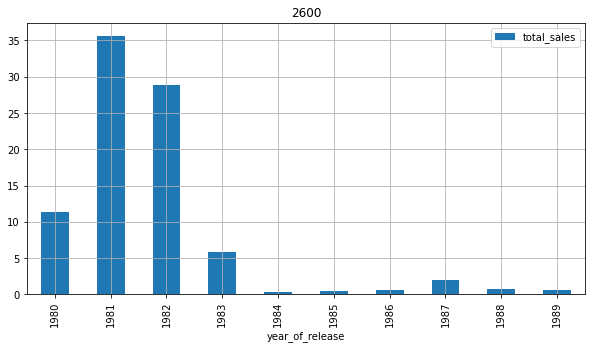

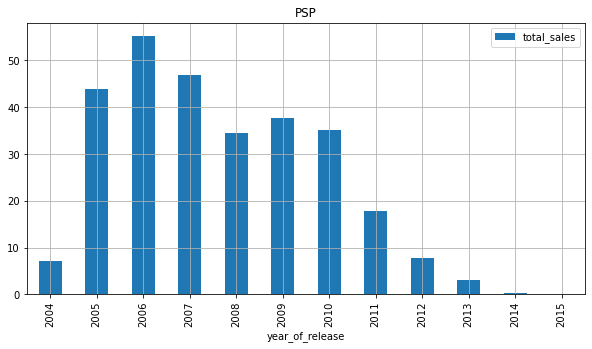

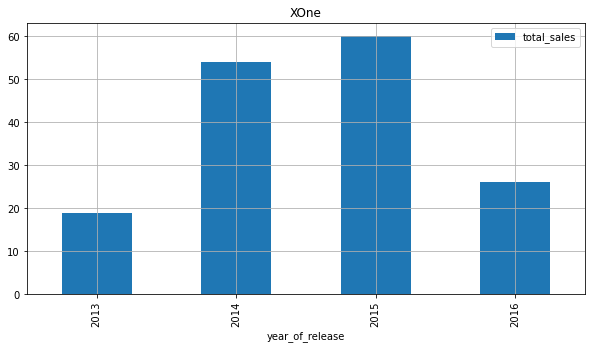

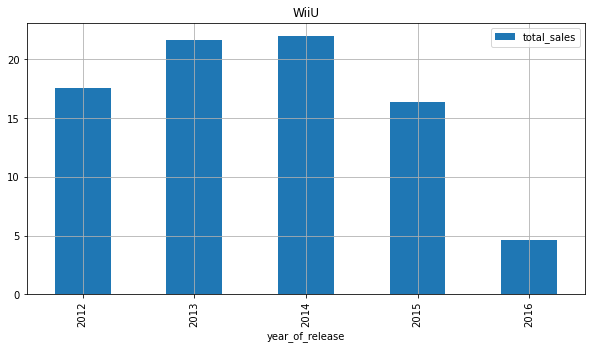

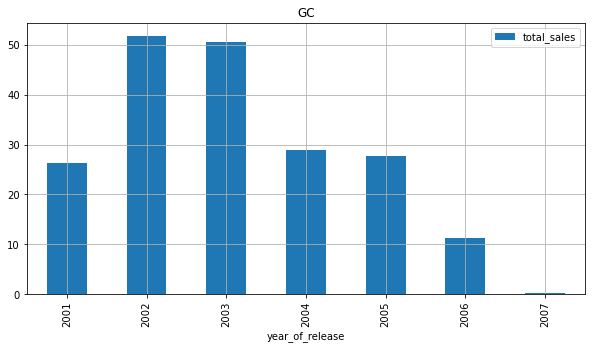

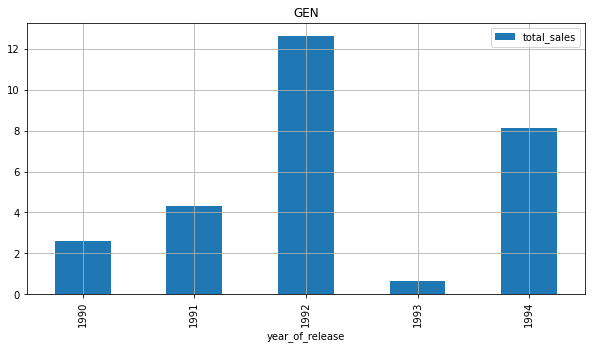

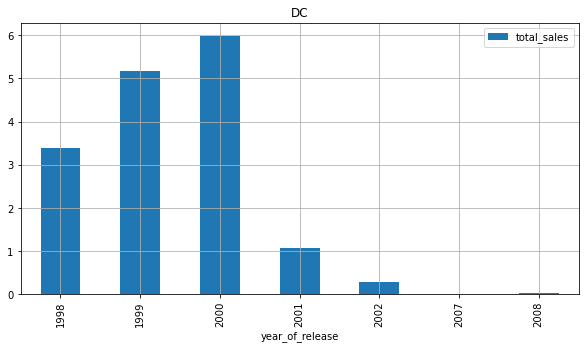

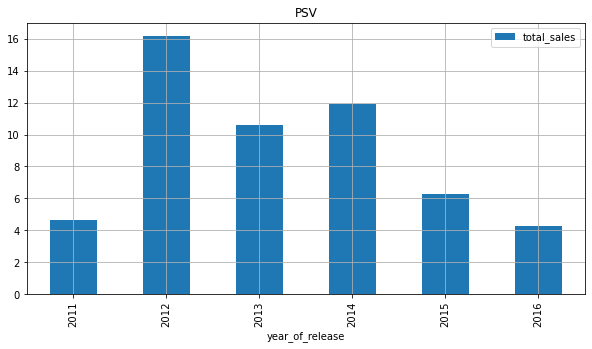

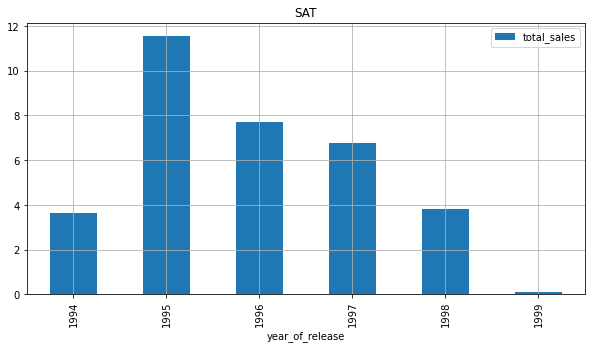

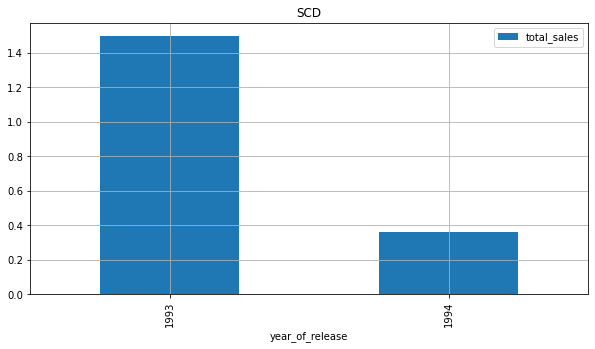

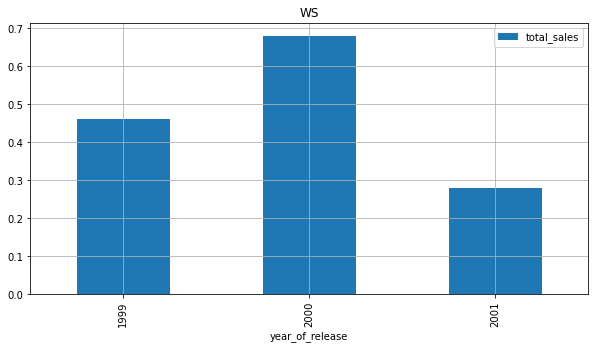

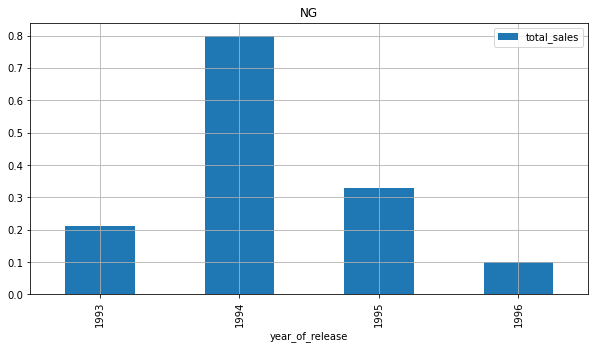

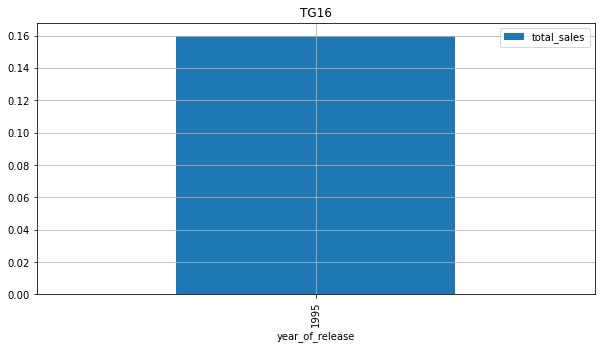

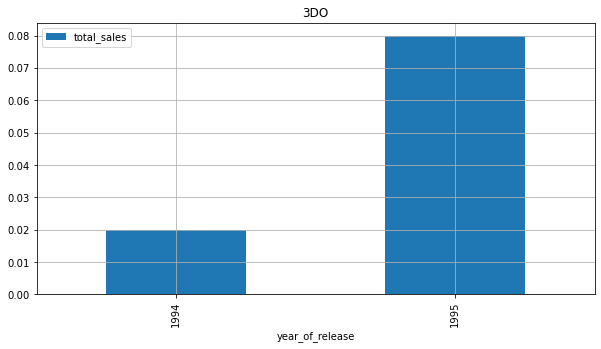

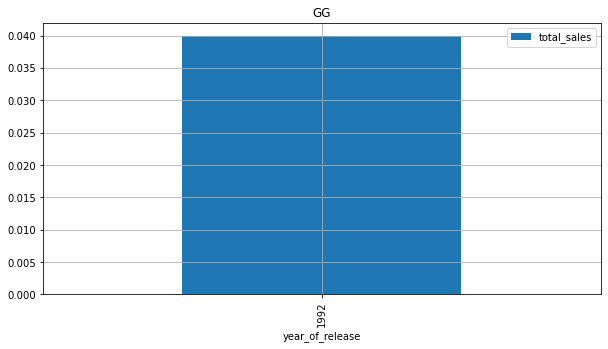

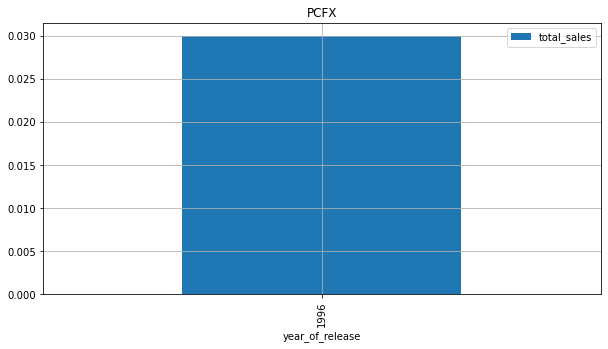

In [56]:
#построение гистограмм продаж игр для каждой платформы по годам
plt.figure()
for platform in list_platform:
    df[df['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (10,5), grid = True)
    plt.title(platform)
    plt.show()

По графикам можно сделать вывод, что у платформ есть некая "продолжительность жизни", и в среднем она составляет 10-11 лет. После этого продажи затухают или вообще исчезают с графика - в это время на смену платформе приходит ее улучшенная версия или кардинально другая платформа.

In [57]:
#посмотрим на рейтинг платформ по сумме продаж
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:xlabel='platform'>

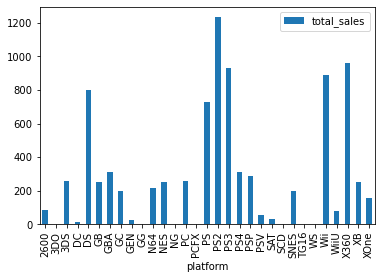

In [58]:
#визуализируем продажи по платформам
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(kind = 'bar')

Из всех платформ выбиваются явные лидеры - 6 платформ -  DS, PS, PS2, PS3, Wii, X360.

In [59]:
#составим таблицу топ-6 по продажам методом отбора 6 первых наибольших продаж
top_6_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(6)

In [60]:
#вывод топ-6 платформ по продажам
top_6_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Построим распределение по годам для каждой из 6 платформ.

In [61]:
#составим список этих платформ
list_top_6 = pd.Series(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])

<Figure size 432x288 with 0 Axes>

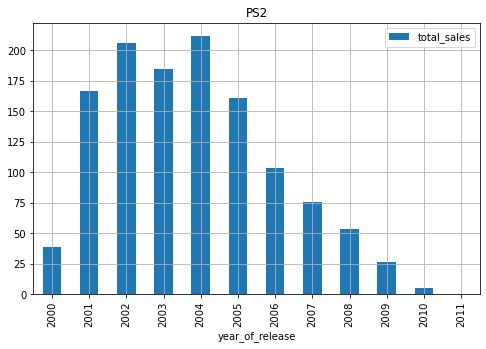

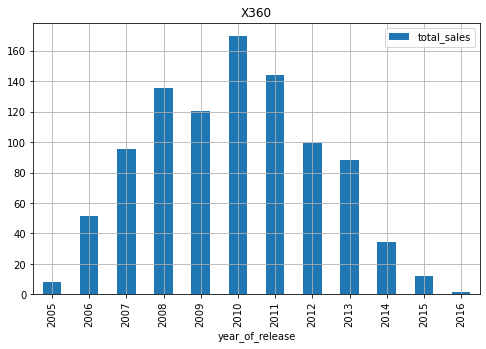

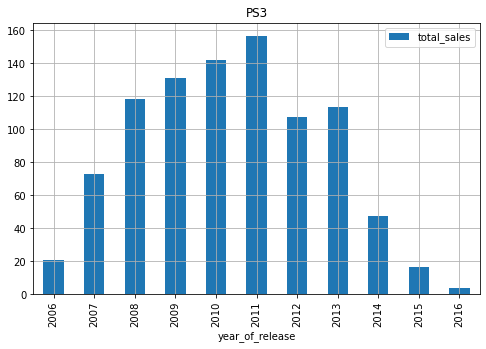

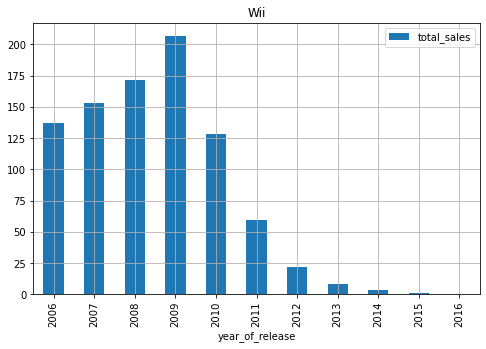

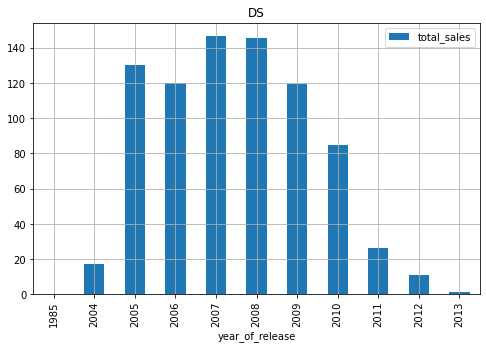

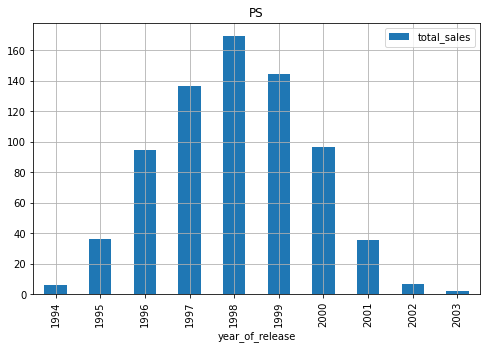

In [62]:
#вывод графиков продаж для каждой платформы по годам
plt.figure()
for platform in list_top_6:
    df[df['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (8,5), grid = True)
    plt.title(platform)
    plt.show()

Выявили 6 лидеров продаж за весь период. Но по графикам произошло затухание к исследуемому году (2016). 
Отсюда можно сделать вывод,что либо консоли перестали быть популярны, либо произошло просто улучшение старых версий. 
Раз это топы продаж, смело можно предположить, что у них есть более современные аналоги. 
Посмотрим на тепловую карту ниже:

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

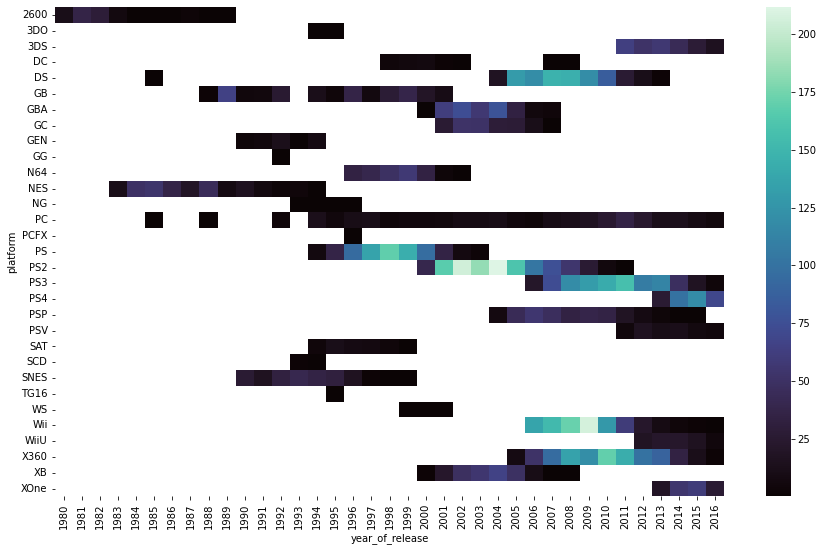

In [63]:
#построим тепловую карту продаж на всех платформах по годам
plt.figure(figsize = (15, 9))
seaborn.heatmap(df.pivot_table(index = 'platform', columns = 'year_of_release', values='total_sales', aggfunc = 'sum'), cmap="mako")

Здесь можем выделить платформы, которые еще "живы" к нашему периоду. И тут можно связать пары из топ-6:
1) PS2 - его заменила **PS3**, но с уже затухающими продажами;
    
2) X360 - более современная **XOne**;
    
3) PS3 - сама она уже довольно "старая",продажи пока есть, но скоро ее век пройдет. Есть более современная **PS4**;
    
4) Wii - теперь **WiiU**;

5) DS - теперь **3DS**;
    
6) PS совсем ушла, еще на этапе PS2, зато всегда у людей был компьютер, добавим его в актуальный топ - **PC**.

7) Также возьмем продаваемые игры для **PSV**

#### *Актуальный период*

Актуальный период можно сократить до 5, а то и 4-х лет до прогнозируемого. Это хорошо видно в связке PS3 и PS4. График продаж игр для PS3 спал к 2014 году из-за новой PS4.
Можем выбрать актуальным период после 2012 года.
Создадим новую таблицу по срезу периода и будем в дальнейшем анализировать её.

In [64]:
#создание новой таблицы из старой по срезу после 2012 года
period_df = df[df['year_of_release'] > 2012]
period_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


#### *Диаграмма размаха (Ящик с усами)* 

Выше мы выбрали актуальные платформы. Сделаем по ним срез из таблицы period_df.

In [65]:
#Создание списка "живых" актуальных платформ и создание таблицы из них
list_live = ['PS3', 'PS4', 'PC', '3DS', 'XOne', 'WiiU', 'PSV']
top_platform_period = period_df[period_df['platform'].isin(list_live)]

In [66]:
#вывод таблицы с актуальными платформами и периодом
top_platform_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


Можно заметить, что количество строк таблицы period_df и top_platform_period почти равны - около 2000 строк. Значит, период выбран самым актуальным с новыми современными актуальными платформами.

Посмотрим график "ящик с усами" для наших собранных данных.

Text(0, 0.5, 'Глобальные продажи')

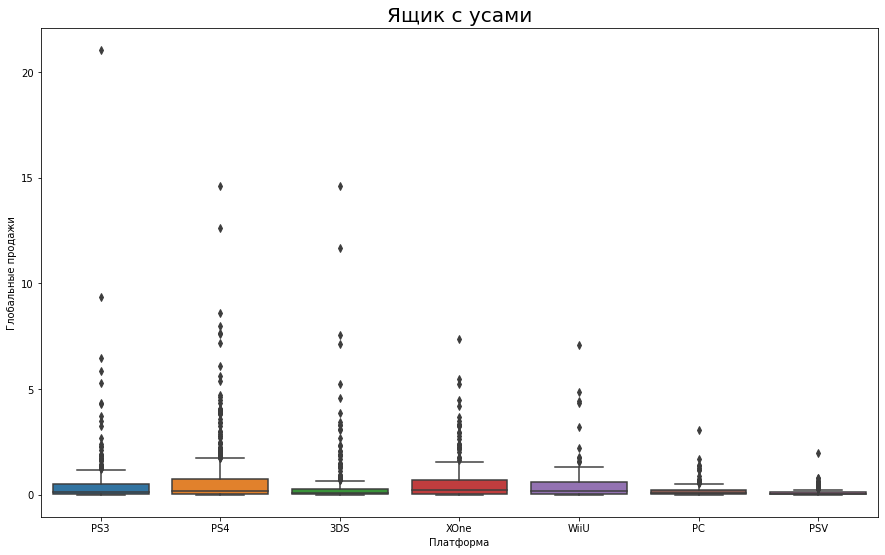

In [67]:
#построение график ящик с усами по продажам в разбивке по платформам
plt.figure(figsize= (15, 9))
seaborn.boxplot(data=top_platform_period, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

Вывод:
Самые большие продажи у игр для PS4 И XOne. Причем, средний уровень продаж у PS4 выше, чем у XOne. Но медиана говорит об обратном, и в случае с PS4 не стремится к длинному хвосту выбросов. По графику видно, что таких редких случаев у PS4 гораздо больше, чем у XOne. Были какие-то крупные всплески продаж игр.

Практически одинаковые показатели между собой имеют платформы PS3 и WiiU. У PS3, также как у предшественника, медиана не стремится к тоже длинному хвосту, в котором наблюдается максимальный редкий выброс.

Среди аутсайдеров в нашем списке - 3DS, PC, PSV.

У 3DS из этих трех показатели среднего лучше, но медиана у всех троих наименьшая и почти равна. Также у 3DS она также не стремится к высоким выбросам.

Игры на PC имеют место быть, но не так актуальны. Компьютеры редко используются по этому назначению, еще многие не видят смысла в покупке игр на ПК из-за возможности легко игру скачать.

PSV портативная консоль имеет ограниченный набор игр и не пользуется популярностью.

Text(0, 0.5, 'Глобальные продажи')

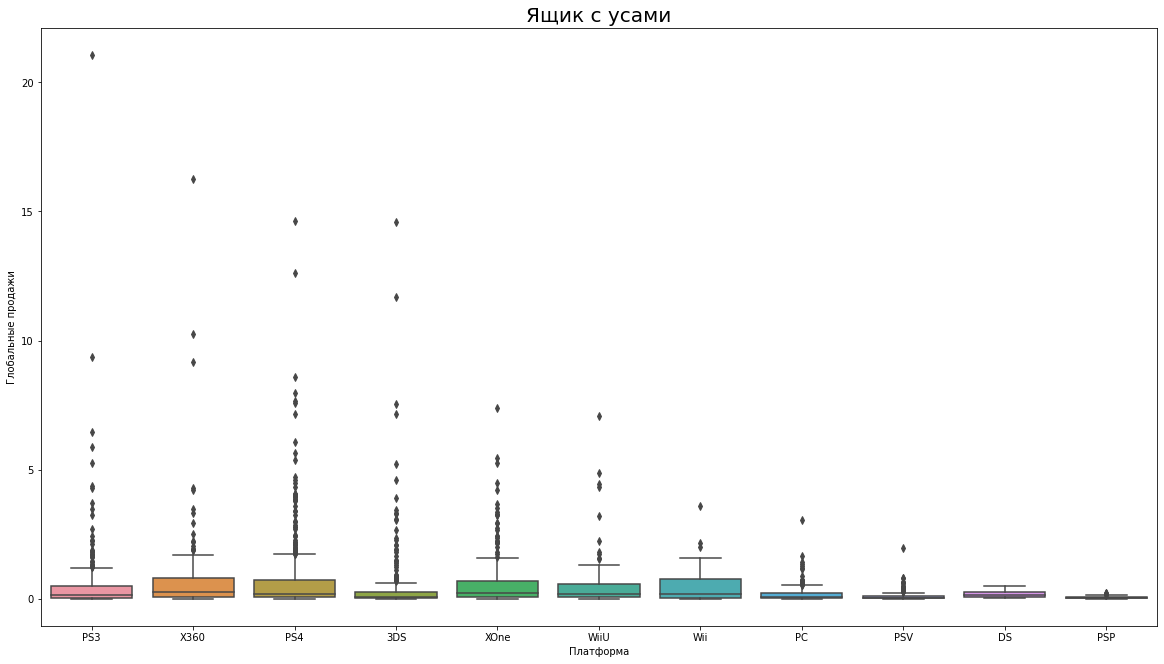

In [68]:
#построение график ящик с усами по продажам в разбивке по платформам в полном виде
plt.figure(figsize= (20, 11))
seaborn.boxplot(data=period_df, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

По этому графику не все понятно, избавимся от редких выбросов уменьшив масштаб.

Text(0, 0.5, 'Глобальные продажи')

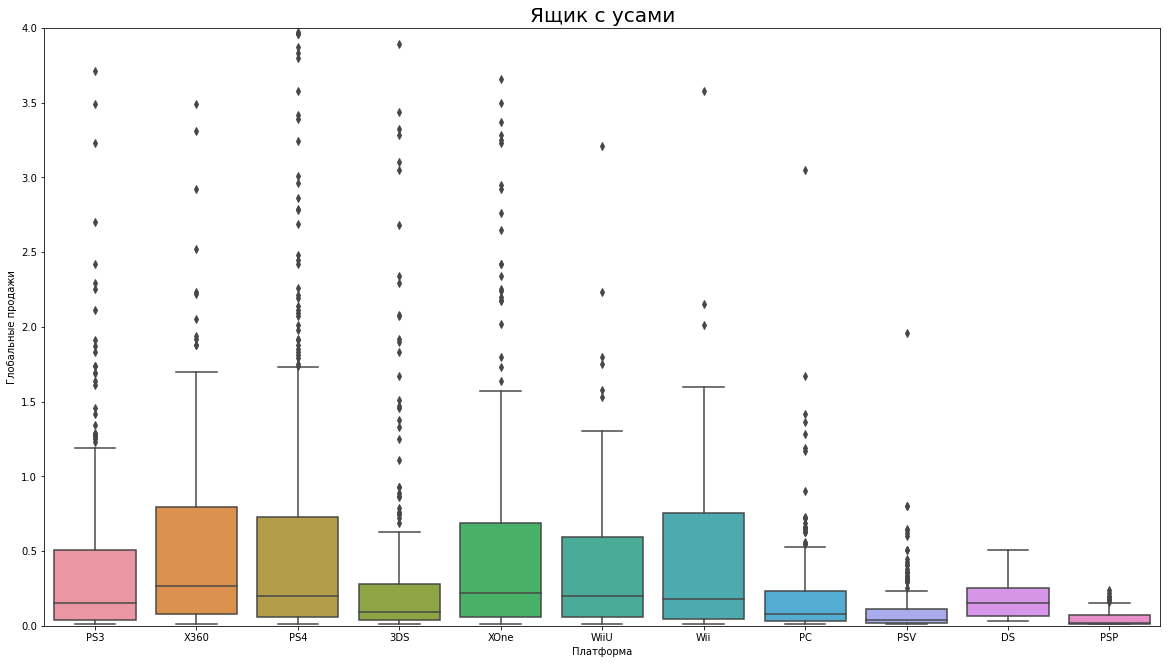

In [69]:
#построение график ящик с усами по продажам в разбивке по платформам с измененным масштабом
plt.figure(figsize= (20, 11))
seaborn.boxplot(data=period_df, x='platform', y='total_sales')
plt.ylim(0, 4)
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

Стало намного понятнее, еще уменьшим масштаб без редких выбросов - до значения 2.

Text(0, 0.5, 'Глобальные продажи')

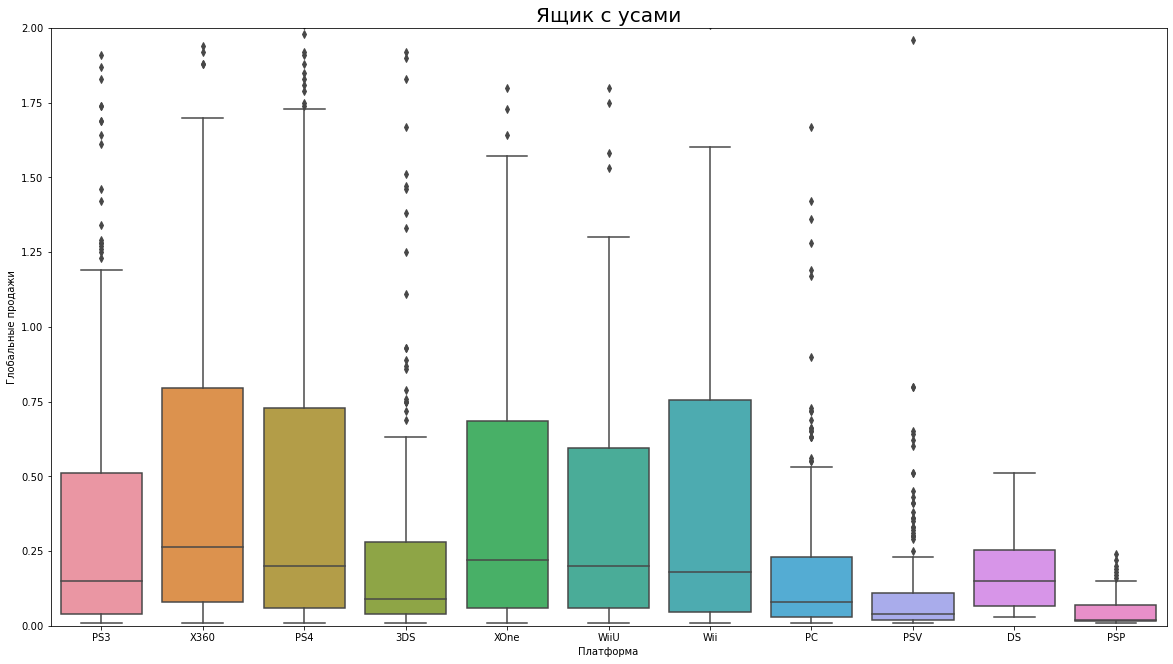

In [70]:
#построение график ящик с усами по продажам в разбивке по платформам с измененным масштабом
plt.figure(figsize= (20, 11))
seaborn.boxplot(data=period_df, x='platform', y='total_sales')
plt.ylim(0, 2)
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

In [71]:
#вывод таблицы с описанием данных продаж, группированных по платформе 
period_df.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


###### Вывод:
Верхние усы X360 и PS4 почти одинаковые, но медиана у X360 больше. Важно отметить, что это игры из разных поколений. Предшественник PS4 - PS3 не может похвастаться таким его результатом, как его более современный аналог. Их медианы 0.51 и 0.73 существенно различаются, при этом PS3 не дотягивает до верхнего уса PS4.

У XOne же относительно предшественника X360 всё идет ровнее: медиана XOne - 0.69, X360 - 0.79. XOne имеет почти одинаковый верхний ус с X360. Ситуация с продажами гораздо стабильнее, чем у конкурентов PS3 и PS4.

У Wii и WiiU медианы 0.75 и 0.59 соответственно. Верхний ус и медиана выше у прошлого поколения - у Wii. 

У 3DS показатели практически наравне с PC. Причем, у предшественника - DS - медиана выше, чем у 3DS, но чуть ниже верхний показатель.

Аутсайдерами-платформами являются PSV и PSP.


#### *Диаграмма рассеяния и корреляция между отзывами и продажами*

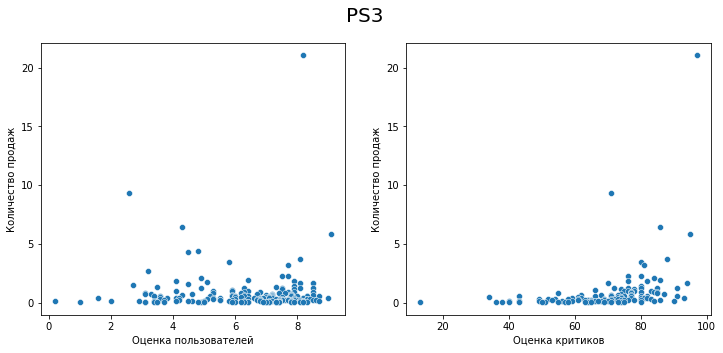

Корреляция между отзывами пользователей и продажами игр 0.0023944027357566925
Корреляция между оценками критиков и продажами игр 0.3342853393371919


In [72]:
platform = top_platform_period[top_platform_period['platform']== 'PS3']
fig, ax = plt.subplots(1 ,2, figsize=(12,5))
seaborn.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
seaborn.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
fig.suptitle('PS3', fontsize=20)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()
user_corr = platform['user_score'].corr(platform['total_sales'])
critic_corr = platform['critic_score'].corr(platform['total_sales'])  
print('Корреляция между отзывами пользователей и продажами игр', user_corr)
print('Корреляция между оценками критиков и продажами игр', critic_corr)

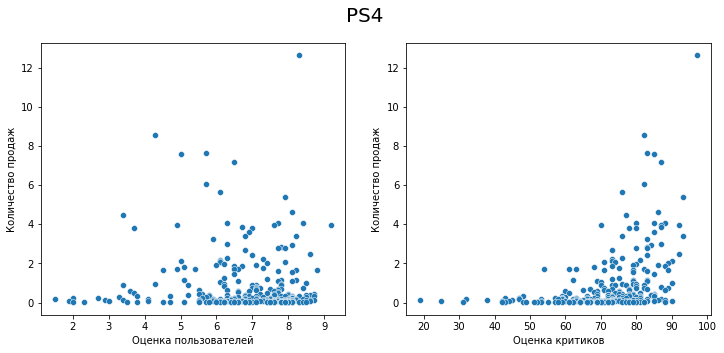

Корреляция между отзывами пользователей и продажами игр -0.031957110204556424
Корреляция между оценками критиков и продажами игр 0.40656790206178095


In [73]:
platform = top_platform_period[top_platform_period['platform']== 'PS4']
fig, ax = plt.subplots(1 ,2, figsize=(12,5))
seaborn.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
seaborn.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
fig.suptitle('PS4', fontsize=20)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()
user_corr = platform['user_score'].corr(platform['total_sales'])
critic_corr = platform['critic_score'].corr(platform['total_sales'])  
print('Корреляция между отзывами пользователей и продажами игр', user_corr)
print('Корреляция между оценками критиков и продажами игр', critic_corr)

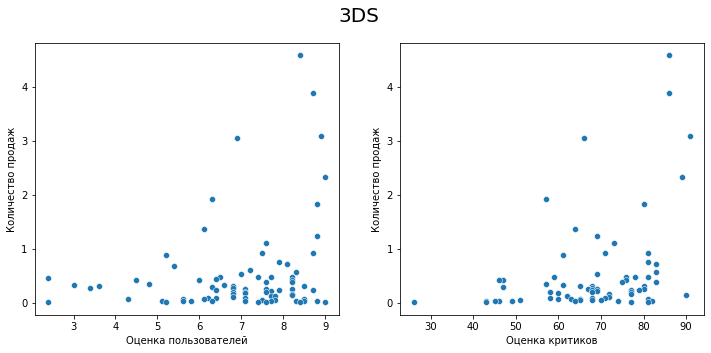

Корреляция между отзывами пользователей и продажами игр 0.24150411773563016
Корреляция между оценками критиков и продажами игр 0.3570566142288103


In [74]:
platform = top_platform_period[top_platform_period['platform']== '3DS']
fig, ax = plt.subplots(1 ,2, figsize=(12,5))
seaborn.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
seaborn.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
fig.suptitle('3DS', fontsize=20)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()
user_corr = platform['user_score'].corr(platform['total_sales'])
critic_corr = platform['critic_score'].corr(platform['total_sales'])  
print('Корреляция между отзывами пользователей и продажами игр', user_corr)
print('Корреляция между оценками критиков и продажами игр', critic_corr)

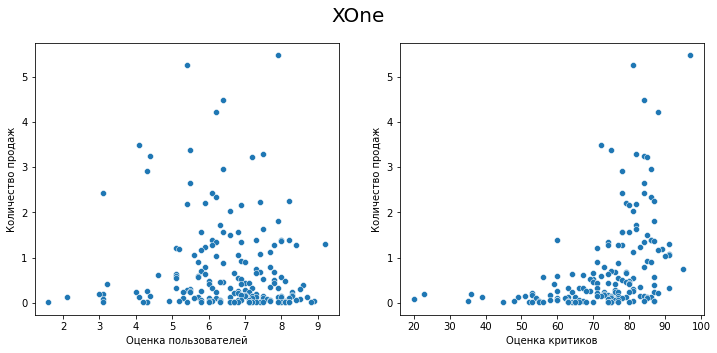

Корреляция между отзывами пользователей и продажами игр -0.06892505328279414
Корреляция между оценками критиков и продажами игр 0.4169983280084017


In [75]:
platform = top_platform_period[top_platform_period['platform']== 'XOne']
fig, ax = plt.subplots(1 ,2, figsize=(12,5))
seaborn.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
seaborn.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
fig.suptitle('XOne', fontsize=20)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()
user_corr = platform['user_score'].corr(platform['total_sales'])
critic_corr = platform['critic_score'].corr(platform['total_sales'])  
print('Корреляция между отзывами пользователей и продажами игр', user_corr)
print('Корреляция между оценками критиков и продажами игр', critic_corr)

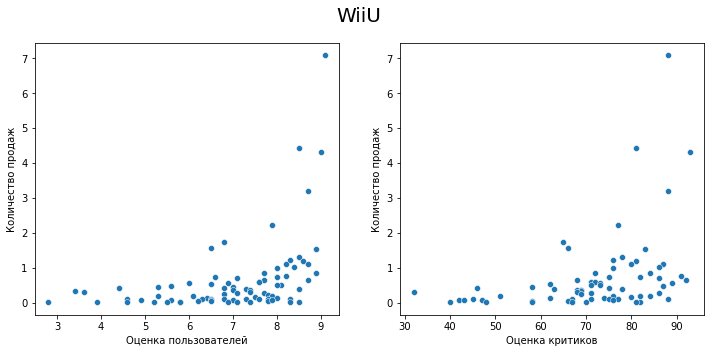

Корреляция между отзывами пользователей и продажами игр 0.4193304819266187
Корреляция между оценками критиков и продажами игр 0.3764149065423912


In [76]:
platform = top_platform_period[top_platform_period['platform']== 'WiiU']
fig, ax = plt.subplots(1 ,2, figsize=(12,5))
seaborn.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
seaborn.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
fig.suptitle('WiiU', fontsize=20)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()
user_corr = platform['user_score'].corr(platform['total_sales'])
critic_corr = platform['critic_score'].corr(platform['total_sales'])  
print('Корреляция между отзывами пользователей и продажами игр', user_corr)
print('Корреляция между оценками критиков и продажами игр', critic_corr)

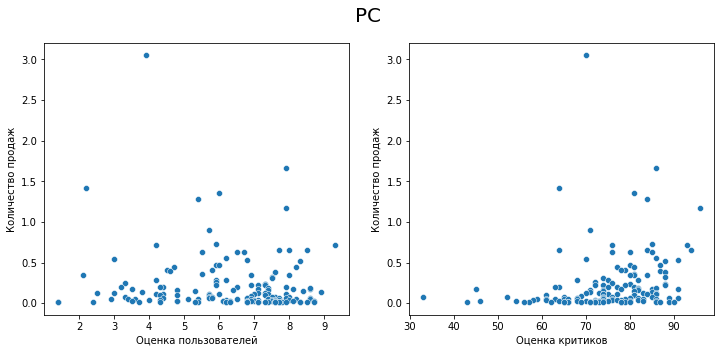

Корреляция между отзывами пользователей и продажами игр -0.0938418695247674
Корреляция между оценками критиков и продажами игр 0.19603028294369382


In [77]:
platform = top_platform_period[top_platform_period['platform']== 'PC']
fig, ax = plt.subplots(1 ,2, figsize=(12,5))
seaborn.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
seaborn.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
fig.suptitle('PC', fontsize=20)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()
user_corr = platform['user_score'].corr(platform['total_sales'])
critic_corr = platform['critic_score'].corr(platform['total_sales'])  
print('Корреляция между отзывами пользователей и продажами игр', user_corr)
print('Корреляция между оценками критиков и продажами игр', critic_corr)

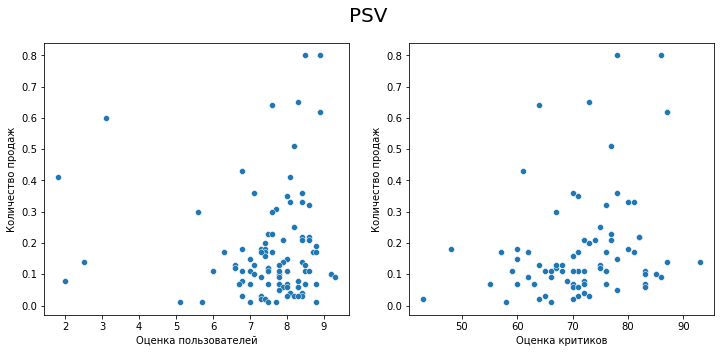

Корреляция между отзывами пользователей и продажами игр 0.0009424723319108626
Корреляция между оценками критиков и продажами игр 0.2547423503068656


In [78]:
platform = top_platform_period[top_platform_period['platform']== 'PSV']
fig, ax = plt.subplots(1 ,2, figsize=(12,5))
seaborn.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
seaborn.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
fig.suptitle('PSV', fontsize=20)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
plt.show()
user_corr = platform['user_score'].corr(platform['total_sales'])
critic_corr = platform['critic_score'].corr(platform['total_sales'])  
print('Корреляция между отзывами пользователей и продажами игр', user_corr)
print('Корреляция между оценками критиков и продажами игр', critic_corr)

###### Вывод:

Почти у всех нет связи между оценками пользователей и продажами игр, либо она очень низкая.

У PS4, Xone, PC корреляция между отзывами пользователей и продажами минусовая(связь отсутствует). Для продаж игр на платформы не важно, какие оценки ставят игроки. 

Побольше влияют на продажи оценки пользователей игр для WiiU, умеренно влияют на продажи игр для PC.

Чего не скажешь об оценках игр критиками: их оуенки влияют на продажи игр умеренно.

#### *Распределение игр по жанрам*

In [79]:
df_genre_top = top_platform_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index()
df_genre_top

,genre,total_sales
0,Action,270.10
1,Shooter,197.50
2,Role-Playing,140.43
3,Sports,123.02
4,Misc,43.02
5,Platform,37.55
6,Racing,36.82
7,Fighting,32.74
8,Adventure,20.80
9,Simulation,20.52


Text(0, 0.5, 'Продажи')

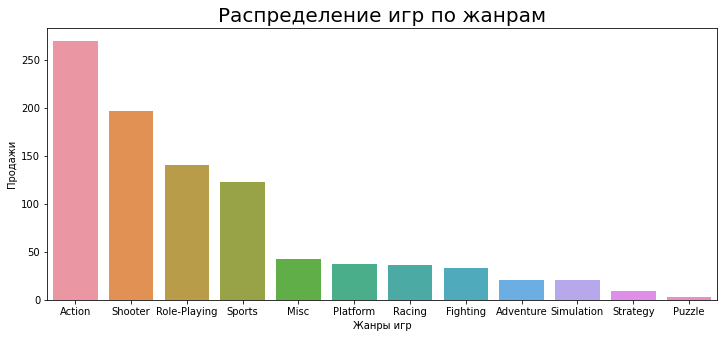

In [80]:
plt.figure(figsize=(12,5))
plt.title('Распределение игр по жанрам', fontsize=20)
seaborn.barplot(data=df_genre_top, x='genre', y='total_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')

###### Вывод:
В явных лидерах находятся 4 жанра - больше всего людям нравится играть в buhs c жанрами: Action, Shooter, Role_playing и Sports.
Менее всего людям нравятся игры в жанер Puzzle.

Text(0, 0.5, 'Продажи')

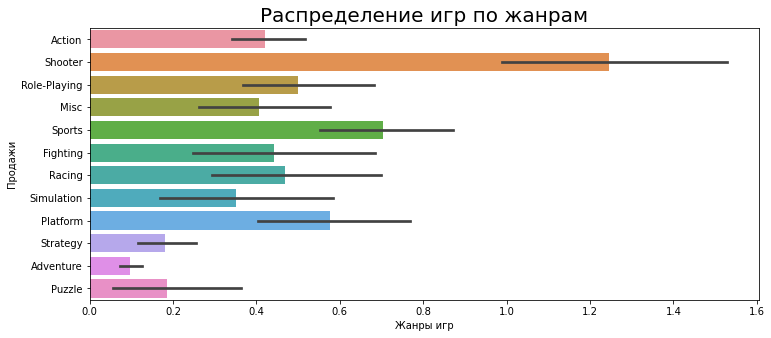

In [81]:
#график не по топ платформам, а по актуальному периоду
plt.figure(figsize=(12,5))
plt.title('Распределение игр по жанрам', fontsize=20)
seaborn.barplot(data=period_df, y='genre', x='total_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')

Text(0, 0.5, 'Глобальные продажи')

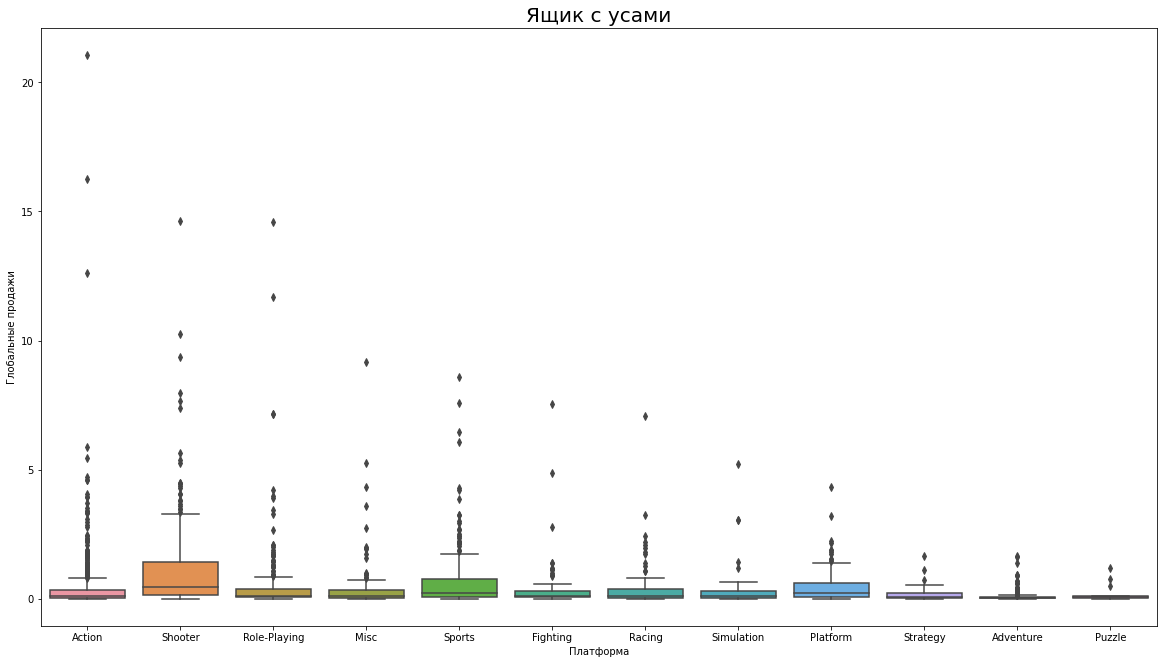

In [82]:
#построение график ящик с усами по продажам в разбивке по жанрам
plt.figure(figsize= (20, 11))
seaborn.boxplot(data=period_df, x='genre', y='total_sales')
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

Text(0, 0.5, 'Глобальные продажи')

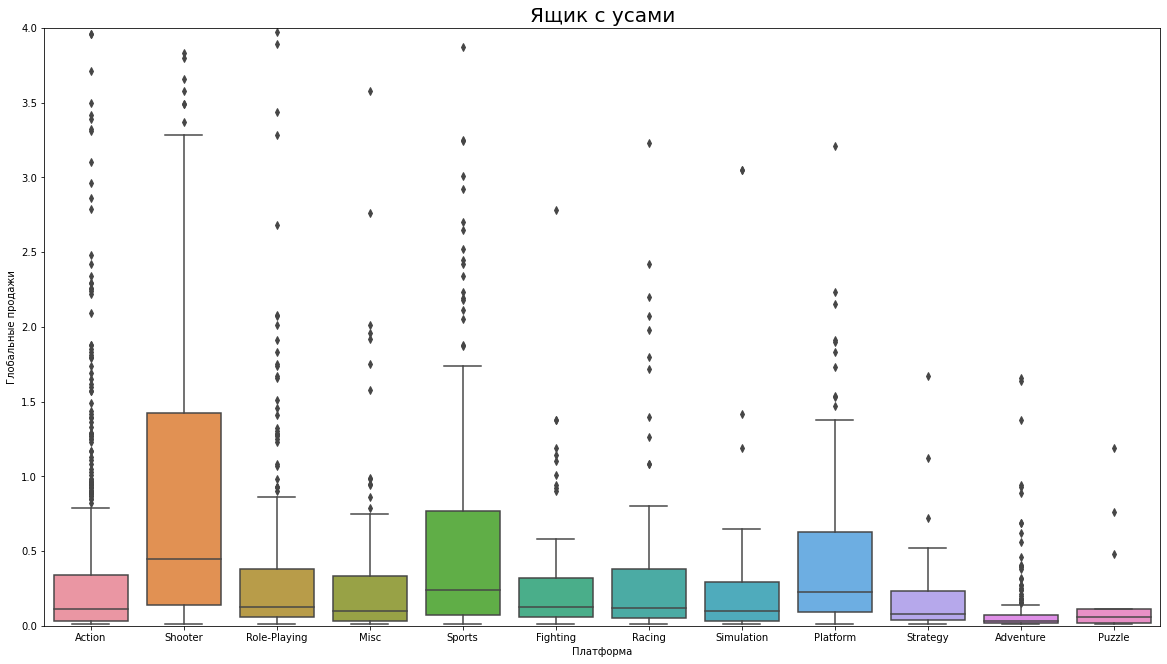

In [83]:
#построение график ящик с усами по продажам в разбивке по жанрам с уменьшенным масштабом
plt.figure(figsize= (20, 11))
seaborn.boxplot(data=period_df, x='genre', y='total_sales')
plt.ylim(0, 4)
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

In [84]:
#вывод таблицы с описанием данных продаж, группированных по жанру
period_df.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


###### Вывод
Лидер в жанрах по продажам - Shooter. Он обходит все остальные жанры и по медиану (1.42), и по максимуму - примерно в значении 3.4.
Далее почти на одном уровне расположились Sports и Platform - их медианы 0.76 и 0.62 соответственно. Максимальное значение, да и медиана, у Sports немного выше.
Остальные жанры имеют почти одинаковые показатели, кроме Adventure и Puzzle - это явные жанры-аутсайдеры.

### Портрет пользователя каждого региона

#### *Портрет пользователя Северной Америки (NA)*

In [85]:
#создание сводной таблицы по платформам
na_platform_period = period_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).reset_index()

In [86]:
#добавление к сводной таблице нового столбца с названиями платформ и Другие(не топ-5 платформ)
top_na_platform_period = na_platform_period.head(5)
na_platform_period['category'] = na_platform_period['platform'].where(
    na_platform_period['platform'].isin(top_na_platform_period['platform']), 'Other')

In [87]:
#удаление столбца всех платформ
na_platform_period = na_platform_period.drop(columns ='platform')

In [88]:
#группировка продаж с учетом нового столбца платформ
na_platform_period = na_platform_period.pivot_table(index='category', values='na_sales', aggfunc='sum').reset_index(drop=False)
na_platform_period

,category,na_sales
0,3DS,38.20
1,Other,52.49
2,PS3,63.50
3,PS4,108.74
4,X360,81.66
5,XOne,93.12


In [89]:
#создание сводной таблицы по жанрам
na_genre_period = period_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).reset_index()

In [90]:
#добавление к сводной таблице нового столбца с названиями платформ и Другие(не топ-5 платформ)
top_na_genre_period = na_genre_period.head(5)
na_genre_period['category'] = na_genre_period['genre'].where(
    na_genre_period['genre'].isin(top_na_genre_period['genre']), 'Other')

In [91]:
#удаление столбца всех жанров
na_genre_period = na_genre_period.drop(columns ='genre')

In [92]:
#группировка продаж с учетом нового столбца жанров
na_genre_period = na_genre_period.pivot_table(index='category', values='na_sales', aggfunc='sum').reset_index(drop=False)
na_genre_period

,category,na_sales
0,Action,126.05
1,Misc,27.49
2,Other,62.76
3,Role-Playing,46.40
4,Shooter,109.74
5,Sports,65.27


In [93]:
#создание сводной таблицы по рейтингу
na_rating_period = period_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).reset_index()
na_rating_period

,rating,na_sales
0,M,165.21
1,Unknown,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


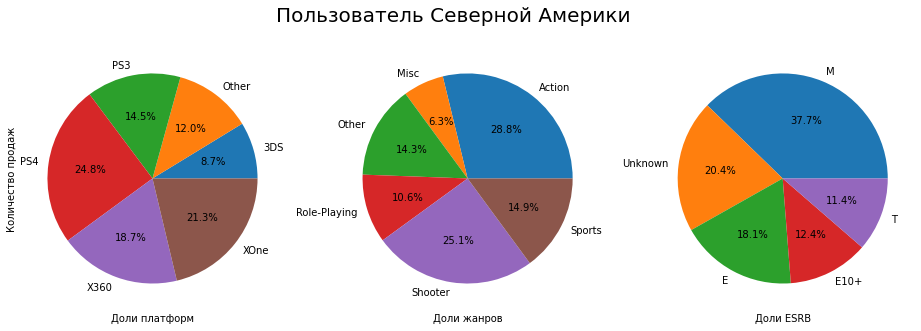

In [94]:
fig, ax = plt.subplots(1 ,3, figsize=(16, 5))
ax[0].pie(na_platform_period['na_sales'], labels = na_platform_period['category'], autopct='%1.1f%%')
ax[1].pie(na_genre_period['na_sales'], labels = na_genre_period['category'], autopct='%1.1f%%')
ax[2].pie(na_rating_period['na_sales'], labels = na_rating_period['rating'], autopct='%1.1f%%')
fig.suptitle('Пользователь Северной Америки', fontsize=20)
ax[0].set(xlabel='Доли платформ')
ax[1].set(xlabel='Доли жанров')
ax[2].set(xlabel='Доли ESRB')
ax[0].set(ylabel='Количество продаж')
plt.show()

In [95]:
na_platform_period = na_platform_period.sort_values(by='na_sales', ascending=False).reset_index()
na_genre_period = na_genre_period.sort_values(by='na_sales', ascending=False).reset_index()

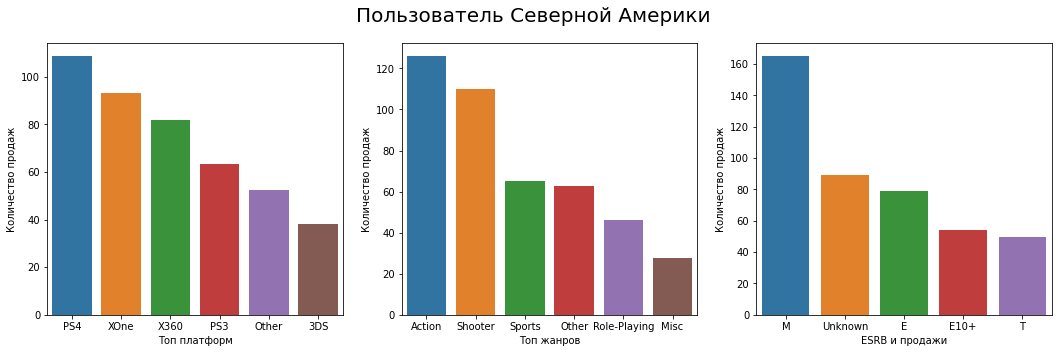

In [96]:
fig, ax = plt.subplots(1 ,3, figsize=(18,5))
seaborn.barplot(data=na_platform_period, x='category', y='na_sales', ax=ax[0])
seaborn.barplot(data=na_genre_period, x='category', y='na_sales', ax=ax[1])
seaborn.barplot(data=na_rating_period, x='rating', y='na_sales', ax=ax[2])
fig.suptitle('Пользователь Северной Америки', fontsize=20)
ax[0].set(xlabel='Топ платформ')
ax[1].set(xlabel='Топ жанров')
ax[2].set(xlabel='ESRB и продажи')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
ax[2].set(ylabel='Количество продаж')
plt.show()

###### Вывод:
За последний актуальный период портрет пользователя Северной Америки - это:
- владелец одной из платформ PS4, XOne, X360, PS3 в порядке популярности. Для Северной Америки характерны стабильные продажи как XOne, так и X360, чего не скажешь о PlayStation.
- игрок, предпочитающий жанры Action, Shooter, Sports;
- игрок с играми из возрастной категории M ("Mature") - от 17 и выше, Unknown - играми без категории (возможно, Японскими из-за портативных консолей в рейтинге), категории E("Everyone") - для всех, категории T ("Teen") - для подростков 13-19 лет и категории E10+("Everyone 10 and older") - для всех, но с ограниченным возрастом от 10 лет.

#### *Портрет пользователя Европы (EU)*

In [97]:
#создание сводной таблицы по платформам
eu_platform_period = period_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).reset_index()

In [98]:
#добавление к сводной таблице нового столбца с названиями платформ и Другие(не топ-5 платформ)
top_eu_platform_period = eu_platform_period.head(5)
eu_platform_period['category'] = eu_platform_period['platform'].where(
    eu_platform_period['platform'].isin(top_eu_platform_period['platform']), 'Other')

In [99]:
#удаление столбца всех платформ
eu_platform_period = eu_platform_period.drop(columns ='platform')

In [100]:
#группировка продаж с учетом нового столбца платформ
eu_platform_period = eu_platform_period.pivot_table(index='category', values='eu_sales', aggfunc='sum').reset_index(drop=False)
eu_platform_period

,category,eu_sales
0,3DS,30.96
1,Other,58.26
2,PS3,67.81
3,PS4,141.09
4,X360,42.52
5,XOne,51.59


In [101]:
#создание сводной таблицы по жанрам
eu_genre_period = period_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).reset_index()

In [102]:
#добавление к сводной таблице нового столбца с названиями платформ и Другие(не топ-5 платформ)
top_eu_genre_period = eu_genre_period.head(5)
eu_genre_period['category'] = eu_genre_period['genre'].where(
    eu_genre_period['genre'].isin(top_eu_genre_period['genre']), 'Other')

In [103]:
#удаление столбца всех жанров
eu_genre_period = eu_genre_period.drop(columns ='genre')

In [104]:
#группировка продаж с учетом нового столбца жанров
eu_genre_period = eu_genre_period.pivot_table(index='category', values='eu_sales', aggfunc='sum').reset_index(drop=False)
eu_genre_period

,category,eu_sales
0,Action,118.13
1,Other,68.56
2,Racing,20.19
3,Role-Playing,36.97
4,Shooter,87.86
5,Sports,60.52


In [105]:
#создание сводной таблицы по рейтингу
eu_rating_period = period_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).reset_index()
eu_rating_period

,rating,eu_sales
0,M,145.32
1,E,83.36
2,Unknown,78.91
3,E10+,42.69
4,T,41.95


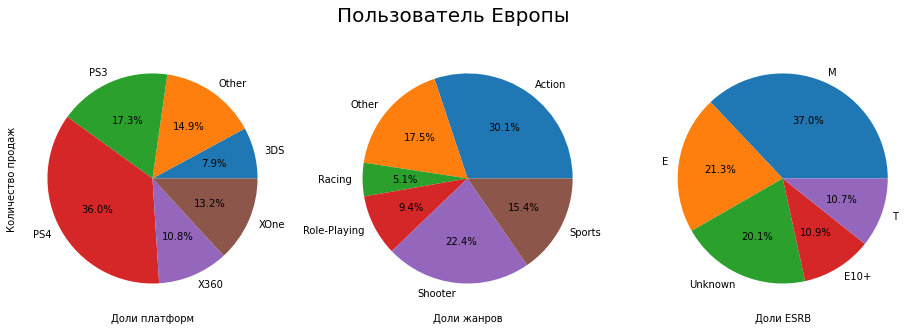

In [106]:
fig, ax = plt.subplots(1 ,3, figsize=(16, 5))
ax[0].pie(eu_platform_period['eu_sales'], labels = eu_platform_period['category'], autopct='%1.1f%%')
ax[1].pie(eu_genre_period['eu_sales'], labels = eu_genre_period['category'], autopct='%1.1f%%')
ax[2].pie(eu_rating_period['eu_sales'], labels = eu_rating_period['rating'], autopct='%1.1f%%')
fig.suptitle('Пользователь Европы', fontsize=20)
ax[0].set(xlabel='Доли платформ')
ax[1].set(xlabel='Доли жанров')
ax[2].set(xlabel='Доли ESRB')
ax[0].set(ylabel='Количество продаж')
plt.show()

In [107]:
eu_platform_period = eu_platform_period.sort_values(by='eu_sales', ascending=False).reset_index()
eu_genre_period = eu_genre_period.sort_values(by='eu_sales', ascending=False).reset_index()

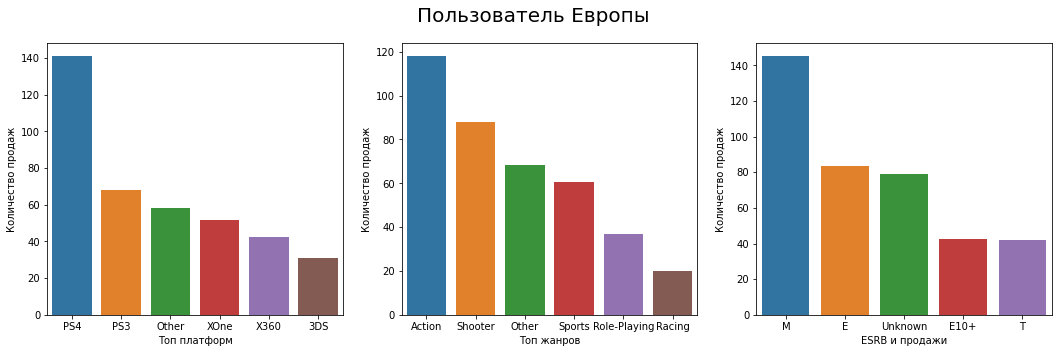

In [108]:
fig, ax = plt.subplots(1 ,3, figsize=(18,5))
seaborn.barplot(data=eu_platform_period, x='category', y='eu_sales', ax=ax[0])
seaborn.barplot(data=eu_genre_period, x='category', y='eu_sales', ax=ax[1])
seaborn.barplot(data=eu_rating_period, x='rating', y='eu_sales', ax=ax[2])
fig.suptitle('Пользователь Европы', fontsize=20)
ax[0].set(xlabel='Топ платформ')
ax[1].set(xlabel='Топ жанров')
ax[2].set(xlabel='ESRB и продажи')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
ax[2].set(ylabel='Количество продаж')
plt.show()

###### Вывод:
За последний актуальный период портрет пользователя Европы- это:
- владелец одной из платформ PS4, PS3, одной из непопулярных платформ, и потом только XOne и X360, причем продажи их сильно уступают и также они гораздо меньше покателей Северной Америки;
- игрок, предпочитающий жанры Action, Shooter, другие жанры, Sports;
- игрок с играми из возрастной категории M ("Mature") - от 17 и выше, категории E("Everyone") - для всех, Unknown - играми без категории (возможно, Японскими из-за портативных консолей в рейтинге), категории T ("Teen") - для подростков 13-19 лет и категории E10+("Everyone 10 and older") - для всех, но с ограниченным возрастом от 10 лет.


#### *Портрет пользователя Японии (JP)*

In [109]:
#создание сводной таблицы по платформам
jp_platform_period = period_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).reset_index()

In [110]:
#добавление к сводной таблице нового столбца с названиями платформ и Другие(не топ-5 платформ)
top_jp_platform_period = jp_platform_period.head(5)
jp_platform_period['category'] = jp_platform_period['platform'].where(
    jp_platform_period['platform'].isin(top_jp_platform_period['platform']), 'Other')

In [111]:
#удаление столбца всех платформ
jp_platform_period = jp_platform_period.drop(columns ='platform')

In [112]:
#группировка продаж с учетом нового столбца платформ
jp_platform_period = jp_platform_period.pivot_table(index='category', values='jp_sales', aggfunc='sum').reset_index(drop=False)
jp_platform_period

,category,jp_sales
0,3DS,67.81
1,Other,4.19
2,PS3,23.35
3,PS4,15.96
4,PSV,18.59
5,WiiU,10.88


In [113]:
#создание сводной таблицы по жанрам
jp_genre_period = period_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).reset_index()

In [114]:
#добавление к сводной таблице нового столбца с названиями платформ и Другие(не топ-5 платформ)
top_jp_genre_period = jp_genre_period.head(5)
jp_genre_period['category'] = jp_genre_period['genre'].where(
    jp_genre_period['genre'].isin(top_jp_genre_period['genre']), 'Other')

In [115]:
#удаление столбца всех жанров
jp_genre_period = jp_genre_period.drop(columns ='genre')

In [116]:
#группировка продаж с учетом нового столбца жанров
jp_genre_period = jp_genre_period.pivot_table(index='category', values='jp_sales', aggfunc='sum').reset_index(drop=False)
jp_genre_period

,category,jp_sales
0,Action,40.49
1,Fighting,7.65
2,Misc,9.20
3,Other,25.79
4,Role-Playing,51.04
5,Shooter,6.61


In [117]:
#создание сводной таблицы по рейтингу
jp_rating_period = period_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).reset_index()
jp_rating_period

,rating,jp_sales
0,Unknown,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


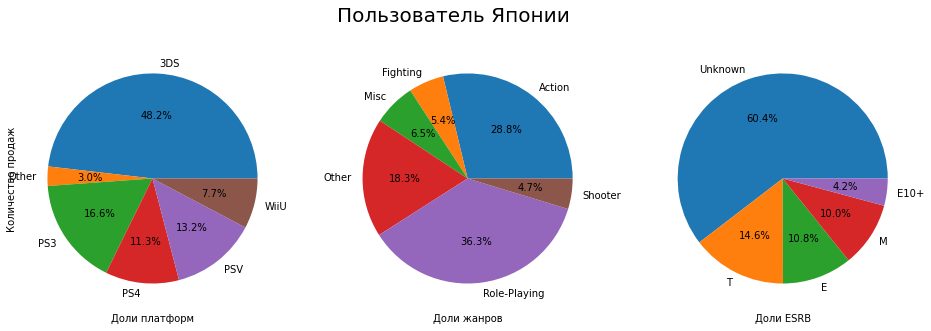

In [118]:
fig, ax = plt.subplots(1 ,3, figsize=(16, 5))
ax[0].pie(jp_platform_period['jp_sales'], labels = jp_platform_period['category'], autopct='%1.1f%%')
ax[1].pie(jp_genre_period['jp_sales'], labels = jp_genre_period['category'], autopct='%1.1f%%')
ax[2].pie(jp_rating_period['jp_sales'], labels = jp_rating_period['rating'], autopct='%1.1f%%')
fig.suptitle('Пользователь Японии', fontsize=20)
ax[0].set(xlabel='Доли платформ')
ax[1].set(xlabel='Доли жанров')
ax[2].set(xlabel='Доли ESRB')
ax[0].set(ylabel='Количество продаж')
plt.show()

In [119]:
jp_platform_period = jp_platform_period.sort_values(by='jp_sales', ascending=False).reset_index()
jp_genre_period = jp_genre_period.sort_values(by='jp_sales', ascending=False).reset_index()

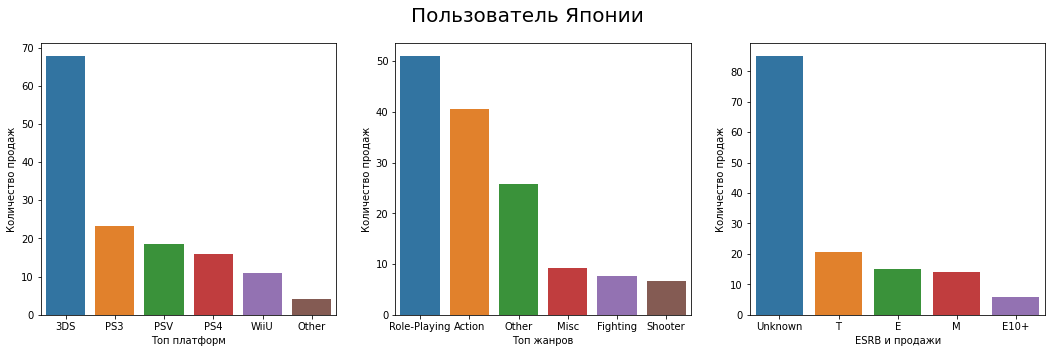

In [120]:
fig, ax = plt.subplots(1 ,3, figsize=(18,5))
seaborn.barplot(data=jp_platform_period, x='category', y='jp_sales', ax=ax[0])
seaborn.barplot(data=jp_genre_period, x='category', y='jp_sales', ax=ax[1])
seaborn.barplot(data=jp_rating_period, x='rating', y='jp_sales', ax=ax[2])
fig.suptitle('Пользователь Японии', fontsize=20)
ax[0].set(xlabel='Топ платформ')
ax[1].set(xlabel='Топ жанров')
ax[2].set(xlabel='ESRB и продажи')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')
ax[2].set(ylabel='Количество продаж')
plt.show()

###### Вывод:
За последний актуальный период портрет пользователя Японии - это:
- владелец одной из платформ 3DS, PS3, PSV, PS4, WiiU в порядке популярности. Распределение в корне отличается от Северной Америки или Европы;
- игрок, предпочитающий жанры Role_Playing, Action, другие жанры;
- игрок с играми из возрастной категории Unknown - играми без категории - здесь уже точно можно заметить, что игры без рейтинга японские и для японских платформ, такой как 3DS - лидера топ-5 платформ Японии, категории T ("Teen") - для подростков 13-19 лет, категории E("Everyone") - для всех, категории M ("Mature") - от 17 и вышеи категории E10+("Everyone 10 and older") - для всех, но с ограниченным возрастом от 10 лет.

Это уже сильно отличающийся пользователь от портрета игрока Северной Америки и Европы. Очень много продаж приходится на японскую платформу Nintendo 3DS, и в топе отсутствует платформа XOne, один из мировых лидеров. 
Кардинально отличаются и жанры игр: больше всего японцам нравится играть в Role_Playing, и только потом в Action как во всем мире. 
Рейтинги также интересно отличаются - если не считать отсутствие рейтинга, то следующим лидером идут игры для подростков, и только где-то в конце для взрослых.

<AxesSubplot:xlabel='platform', ylabel='genre-rating'>

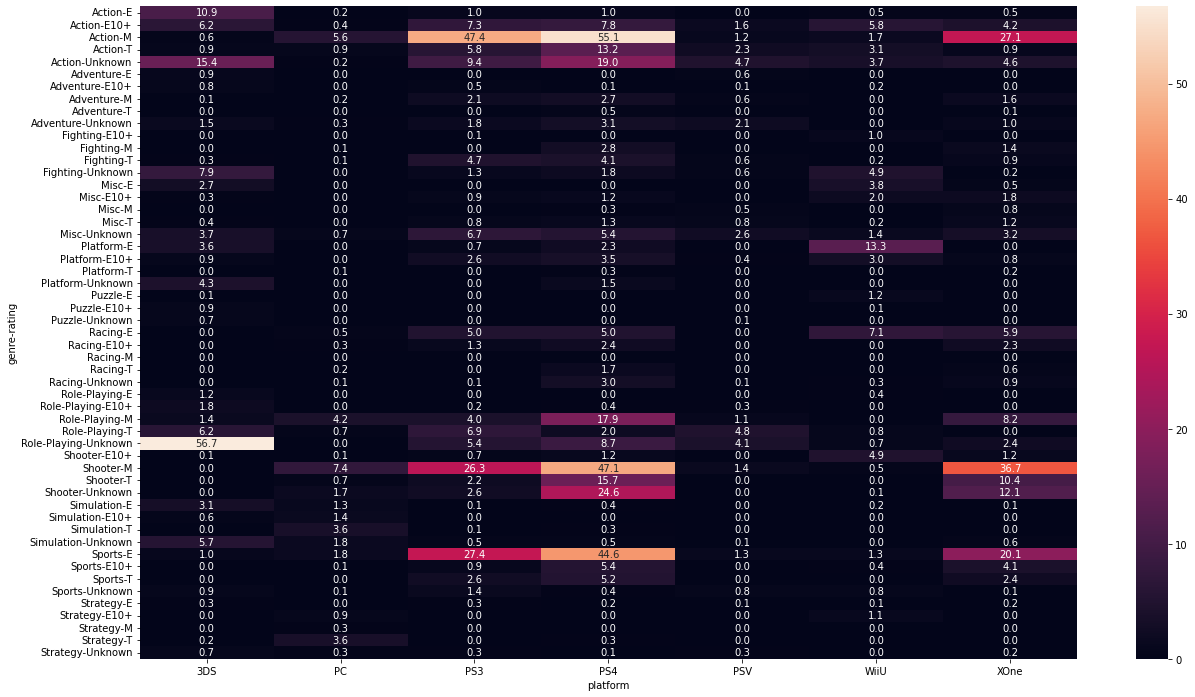

In [121]:
#построение тепловой карты зависимости жанра+рейтинга и платформы
platform_genre_sales = top_platform_period.pivot_table(index=['genre', 'rating'], columns='platform', values='total_sales', aggfunc='sum').fillna(0).applymap(float)
plt.figure(figsize=(21,12))
seaborn.heatmap(platform_genre_sales, annot=True, fmt='.1f', linestyle = '-')

### Проверка гипотез

#### *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза H₀:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [122]:
#создание необходимой таблицы-среза по платформам
xone_period = top_platform_period[top_platform_period['platform'] == 'XOne']['user_score'].dropna()
pc_period = top_platform_period[top_platform_period['platform'] == 'PC']['user_score'].dropna()

In [123]:
#Посчитаем среднюю оценку пользователя для xbox платформ
xone_period.mean()

6.52142857142857

In [124]:
#Посчитаем среднюю оценку пользователя для xbox платформ
pc_period.mean()

6.269677419354836

In [125]:
# Произведем проверку дисперсии выборок
np.var(xone_period)

1.8965188383045533

In [126]:
# Произведем проверку дисперсии выборок
np.var(pc_period)

3.0163063475546332

In [127]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_period, pc_period, equal_var = False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


###### Вывод: 
Значение p-value примерно 16%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, нам нужно раздвинуть доверительный интервал на 16%, чтобы можно было получить различность рейтингов двух платформ.

#### *Средние пользовательские рейтинги жанров Action и Sports разные*

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза H₀:** Средние пользовательские рейтинги жанров Action и Sports одинаковые;

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги жанров Action и Sports разные.

In [128]:
#создание необходимой таблицы-среза по жанрам
action_period = top_platform_period[top_platform_period['genre'] == 'Action']['user_score'].dropna()
sports_period = top_platform_period[top_platform_period['genre'] == 'Sports']['user_score'].dropna()

In [129]:
#Посчитаем среднюю оценку пользователя для xbox платформ
action_period.mean()

6.868621700879766

In [130]:
#Посчитаем среднюю оценку пользователя для xbox платформ
sports_period.mean()

5.385384615384616

In [131]:
# Произведем проверку дисперсии выборок
np.var(action_period)

1.7941180416405094

In [132]:
# Произведем проверку дисперсии выборок
np.var(sports_period)

3.1144786982248527

In [133]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(action_period, sports_period, equal_var = False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.2877105146276235e-15
Отвергаем нулевую гипотезу


###### Вывод: 
Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинаковые средние рейнтинги по двум жанрам.

###### Общий вывод:

Компьютерные игры, как и весь современный мир, быстротечен. Одно сменяет другое. 
Индустрия игр делает их для определенных платформ, которые также довольно быстро сменяют друг друга. Что вчера было высокотехнологичным и современным уходит на задний план. Нужно очень быстро прогнозировать продажи для такой продукции.

В связи с этим, для анализа данных о продажах компьютерных игр был выбран "актуальный период" для дальнейшего прогноза - им стал период с 2013 года по 2016 (исследуемый) год.

Мировыми лидерами на 2016 год стали две платформы-конкуренты - PS4 и XOne. Именно у них наибольшие показатели продаж игр для платформы как в целом за весь игровой период в более ранних версиях(PS2 и X360), так и в актуальном периоде. 
При этом важно отметить, что с продажами на XOne и X360 более стабильная ситуация, игры на X360 лидировали по актуальному периоду, но XOne почти не потерял хватку. У их конкурентов, PS3 и PS4, продажи не настолько стабильны.
Среди аутсайдеров по продажам игр для них стали 3DS, PC, PSV - не очень популярные платформы.

Практически игры для платформы-лидеры покупаются несмотря на оценки покупателей. От оценок критиков они зависят умеренно.

Рассматривая возможные рекламные кампании для стран стоит сказать, что пользователь в Северной Америке покупает для PS4, затем продажи почти в равнораспределены между XOne и X360, и практически не играет на приставках типо Nintendo (3DS). 
Пользователь Европы также предпочтет PS4 и PS3, потом что-то для малопопулярных приставок и только потом XOne и X360.
Пользователь Японии кардинально отличается от них - большинство продаж приходится на игры для 3DS Nintendo, также он купит что-то для PS: PS3, PSV или PS4, причем последняя в аутсайдерах в сравнении с продажами в Северной Америке или Европе.

Для рекламной кампании стоит учесть и предпочтение в жанрах: пользователь Северной Америки выбирает Action, Shooter, Sports; пользователь Европы - также Action, Shooter и что-то из других жанров на равне с Sports; пользователь Японии и тут отличим - поиграет в Role-Playing, и только потом в Action и во что-то иное.

Продажи игр имеют рейтинги: для пользователя Северной Америки больше продаж с рейтингом «M» («Mature»), затем игры с неизвестным рейтингом и затем с рейтингом «E» («Everyone»). 
Для пользователя Европы игры в большинстве также с рейтингом «M» («Mature»), затем «E» («Everyone») и без рейтинга.
И пользователь Японии покупает игры без рейтинга, так как это может быть связано с тем, что игры японские для японских приставок, которые для пользователя Японии входят в топ. Далее рейтинги поделены почти одинаково между «T» («Teen»), «E» («Everyone») и «M» («Mature»).

В анализе было принята гипотеза о том, что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", и отвергнута гипотеза о том, что "Средние пользовательские рейтинги жанров Action и Sports одинаковые".